In [ ]:
pip install unicodedata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata


In [ ]:
pip install re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
pip install varclushi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import unicodedata
import re
from imblearn.over_sampling import SMOTE
import missingno as msno
import seaborn as sns
from  functools import reduce
from scipy.stats import ksone
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from warnings import filterwarnings
from scipy import stats
from scipy.stats import chi2_contingency, chisquare
from sklearn import tree
filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, SGDClassifier, SGDRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, r2_score,mean_squared_error, confusion_matrix,f1_score,plot_roc_curve,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import cufflinks as cf
from plotly.figure_factory import create_dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from varclushi import VarClusHi
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.tree import _tree
from scipy.stats import kruskal
from scipy.stats import chisquare
from statsmodels.stats.multicomp import MultiComparison
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots
import pydotplus
from sklearn import tree
from warnings import filterwarnings
from sklearn.ensemble import IsolationForest

filterwarnings("ignore")
cf.go_offline()
pd.set_option("display.max_columns",200)
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Funciones

In [ ]:
# Función que cuantifica la cantidad de datos que tenemos por variable ( Tomada de clase)
def completitud(df):
    df_aux = pd.DataFrame(df.isnull().sum())
    # Hacemos un data frame que contenga los valores nulos totales por variable.
    df_aux.reset_index(inplace=True)
    #Asignamos un index a cada observación. inplace es para que lo haga sobre el mismo DF.
    df_aux=df_aux.rename(columns={"index":"columna",0:"total"})
    #Asignamos un nombre a cada columna del DF.
    df_aux["completitud(%)"]=(1-df_aux["total"]/df.shape[0])*100
    #Calculamos en qué porcentaje está completa la data.
    df_aux=df_aux.sort_values(by="completitud(%)",ascending=True)
    #Organizamos el DF en orden ascendente, así veremos primero las variables incompletas.
    df_aux.reset_index(drop=True,inplace=True)
    #Reseteamos el index para que preserve su orden.
    return df_aux

In [ ]:
# Funcipon que quita signos, espacios extra y pasa a minúsculas todo el texto que se pase
# en el parámetro text
def clean_text(text, pattern="[^a-zA-Z0-9]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().strip().split())
    return cleaned_text

In [ ]:
# Función para dar un nuevo etiquetado a las variables categóicas
def reetiquetado(df, column, lista, label):
  aux=list(df[df[column].isin(lista)].index)
  df.loc[aux,[column]]= label

## Gráficas

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# Función que genera un gráfico de barras
def barras(df,col,title,x_title="",y_title="", color ='maroon', large=10,width=5, rot=0 ):
  fig = plt.figure(figsize = (large, width))
  plt.style.use(['seaborn'])
  # Creamos un data frame que contiene el número de veces que se encuentra cada dato dento de la columna "col"
  aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
  #Creamos el gráfico
  plt.bar(aux["conteo"].astype(str),aux[col], color =color)

  # Damos nombre a los ejes y jiramos las etiquetas de ser necesario
  plt.xlabel(x_title)
  plt.xticks(rotation=rot)
  plt.ylabel(y_title)
  plt.title(title)
  #Indicamos que queremos un cuadro de simbología
  plt.legend()
  plt.show()

In [ ]:
# Función que genera un histograma y boxplot
def histograma(df, col, x_title= "", y_title=""):
  plt.style.use(['seaborn'])
  # Creaos la figura que tiiene dos ventanas, una para el boxplot y otra para el histograma
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  # Crea el boxplot
  sns.boxplot(df[col], ax=ax_box)

  # Crea el histograma
  sns.histplot(data=df, x=col, ax=ax_hist)
  # Agregaos nombre a cada eje del histograma
  ax_hist.set(xlabel=x_title, ylabel=y_title)
  # Quitamos la etiqueta del eje 'x' del boxplot
  ax_box.set(xlabel='')
  plt.show()

In [ ]:
# Función que crea las etiquetas de proporción el pie
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

# Función que crea una gráfica de paste o de dona
def pie(df, col, donut=0, title ="", color=[]):
  plt.style.use(['seaborn'])
  aux = pd.DataFrame(df[col].value_counts())
  aux.reset_index(inplace=True)
  aux.rename(columns={"index":"columna",col:"total"}, inplace="True")
  fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))
  wedges, texts, autotexts = ax.pie(aux["total"], autopct=lambda pct: func(pct, aux["total"]),
                                    textprops=dict(color="w"), colors = color)

  if donut==1:
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

  ax.legend(wedges, aux["columna"], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
  plt.setp(autotexts, size=8, weight="bold")
  ax.set_title(title)
  plt.show()


In [ ]:
# Función que construye un barplot que muestra la relación entre 2 variables categóricas.
def barplot_relacional(df, col1, col2, bar_width=0.15, color=["Blues"], xlabel="", title="", rot=0,subcat=1):
  """col1 categoria (block de barras) | col2 subcategoria (cada barra) | subcat=1 si la col2 es categórica"""
  plt.style.use(['seaborn'])
  aux = pd.DataFrame(df[[col1,col2]].value_counts())
  aux.reset_index(inplace=True)
  aux.rename(columns = {0:"total"}, inplace=True)
  if subcat==0:
    aux.sort_values(by=[col1, col2], inplace=True)
  else:
    aux.sort_values(by=col1, inplace=True)
  dic_aux={}
  dic_x={}
  labels=list(aux[col2].unique())

  for i in labels:
    dic_aux[str(i)] = list(aux[aux[col2]== i]["total"])

  barWidth = bar_width
  dic_x[str(0)] = np.arange(len(dic_aux[str(labels[0])]))
  j=0
  for i in labels[0:(len(labels)-1)]:
    dic_x[str(j+1)] = [x + barWidth for x in dic_x[str(j)]]
    j= j+1

  # Hace los gráficos en una misma ventana
  for i in range(0, len(dic_x)):
    plt.bar(dic_x[str(i)], dic_aux[str(labels[i])], color=color[i], width=barWidth, edgecolor='white', label=str(labels[i]))

  # Agrega etiquetas al eje x
  plt.xlabel(xlabel, fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(dic_x[str(0)]))], list(aux[col1].unique()), rotation = rot)
  plt.title(title)
  # Crea el recuadro de simbología y muestra la gráfica
  plt.legend()
  plt.show()



## Outliers

In [ ]:
# Función tomada de clase. Solo conservamos dos métodos, IQR y percentiles, no incluímos z-scorre ya que ninguna de nuestras variables parece seguir una
# distribución normal, y removemos el método mean change porque no lo he comprendido por completo.
# Explicaré cada línea de la función para comprobar su entendimiento y agregaré otros datos que me gustaría registrar.
def OUTLIERS(df,cols):
    # Data frame que contendrá nuestros hallazgos
    results=pd.DataFrame()
    # Hacemos una copia de nuestro DF para cada método
    data_iqr=df.copy()
    data_per=df.copy()
    # inicializamos listas de apoyo
    total=[]
    total_per=[]
    indices_=[]
    limInf_iqr=[]
    limSup_iqr=[]
    limInf_perc=[]
    limSup_perc=[]

    # Loop que recorre todas las columnas de nuestro DF
    for col in cols:
        #IQR

        # Q1= 25%
        Q1=df[col].quantile(0.25)
        #Q3= 75%
        Q3=df[col].quantile(0.75)
        # Calculamos el Inter Quantil Range
        IQR=Q3-Q1
        # Calculamos el límite inferior y superior
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
        #Guardamos los límites del intervalo que se considera aceptable
        limInf_iqr.append(round(INF,2))
        limSup_iqr.append(round(SUP,2))
        # Identificamos cuántos datos están por arriba o abjo de los límites de nuestro intervalo de aceptación
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        #Guardamos la información
        total.append(n_outliers)
        # Identificamos los índices de los registros que no están dentro de nuestro intervalo
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)


        #Percentiles

        # Calculamos el perdentil 5% y 95% eliminando los valores nulos
        INF_pe=np.percentile(df[col].dropna(),5)
        SUP_pe=np.percentile(df[col].dropna(),95)
        #Guardamos los límites del intervalo que se considera aceptable
        limInf_perc.append(round(INF_pe,2))
        limSup_perc.append(round(SUP_pe,2))
        # Identificamos cuántos datos están por arriba o abjo de los límites de nuestro intervalo de aceptación
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        #Guardamos la información
        total_per.append(n_outliers_per)
        # Identificamos los índices de los registros que no están dentro de nuestro intervalo
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)



        indices_.append(aux_outliers(indices_iqr,indices_per))

    # Construimos el DF que contendra nuestros hallazgos
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    # Porcentaje de outliers respecto al total de datos
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
         'total_outliers', '%_outliers','indices']]
    return results, limInf_iqr, limSup_iqr,limInf_perc, limSup_perc

In [ ]:
# Función auxiliar que ayuda a identificar los índices que coinciden por ambos métoodos para identificar valores atípicos
def aux_outliers(a,b):
    # Al convertirlos en set/conjunto, nos aseguraos que nos quedamos con valores únicos
    a=set(a)
    b=set(b)

    #Nos quedamos con los valores que también coincidan con el otro método
    a_=a.intersection(b)

    b_=b.intersection(a)

    # regresa una lista con valores únicos e índices que fueron identificados como outliers por ambos métodos
    outliers_index=list(set(list(a_)+list(b_)))
    return outliers_index


In [ ]:
# Función que compara el mejor método de imputación para variables continuas
def comparaImputacion(df, col):
  mean=df[col].mean()
  median=df[col].median()
  mode=df[col].mode()[0]
  originales=list(df[col].dropna().values)
  imputados1=list(df[col].fillna(mean).values)
  imputados2=list(df[col].fillna(median).values)
  imputados3=list(df[col].fillna(mode).values)
  mean_r=stats.ks_2samp(originales,imputados1)[1]
  median_r=stats.ks_2samp(originales,imputados2)[1]
  mode_r=stats.ks_2samp(originales,imputados3)[1]
  return "mean:" + str(mean_r) + " / " + "median:"  + str(median_r) + " / " + "mode:" + str(mode_r)

In [ ]:
# Función que imputa los valores faltantes
def imputacion(df1,df2, col, metodo):
  if metodo == "mean":
    mean=df1[col].mean()
    df1[col].fillna(mean,inplace=True)
    df2[col].fillna(mean,inplace=True)
  elif metodo =="median":
    median=df1[col].median()
    df1[col].fillna(median,inplace=True)
    df2[col].fillna(median,inplace=True)
  elif metodo =="mode":
    mode=df1[col].mode()
    df1[col].fillna(mode,inplace=True)
    df2[col].fillna(mode,inplace=True)
  else:
     print("Método no encontrado.")

In [ ]:
#Función que imputa outliers
def imputar_outliers(X_train, X_test, aux, col):
  new1 = [x for x in aux if x in list(X_train.index)]
  new2 = [x for x in aux if x in list(X_test.index)]
  X_train.loc[new1, [col]] = np.nan
  X_test.loc[new2, [col]] = np.nan
  result=comparaImputacion(X_train,col)
  return result, X_train, X_test

In [ ]:
#Función para multicolineaidad con numéricas (Tomada de clase, explicada por mi)
def calc_vif(X):
    #DF que cuarda los resultados de las variables que se le inegresen 'X'
    vif = pd.DataFrame()
    # Columna con el nombre de las variables
    vif["variables"] = X.columns
    # Calcula el VIF
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
# Función que calcula la multicolinealidad  de variables categoricas (tomada de clase)
def multicolinealidad_cate(df,y,threshold=5,only_final_vif=False):
    '''
    Función para calcular el VIF Genralizado, (GVIF, Fox and Monette 1992)
    Las variables no deben de deben de estar transformadas con OneHotEncoder ya que la función lo realiza internamnete.
    Args:
        df
        y
        threshold
        only_final_vif

    Returns:
        pandas data frame: a data frame, indexed by factor of the GVIF, GVIF^(1/2Df), VIF^(1/2Df)^2
    '''

    df_x = df.drop(y,axis=1)
    #Guardamos los nombres de las columnas añadiendo el prefijo

    onehot_list = list(df_x.select_dtypes(include=['category', 'object', 'string']).columns)
    #Generamos las variables dummy

    df_1hot = pd.get_dummies(df_x, drop_first=True, dummy_na=False, prefix_sep='_')


    #Dataframe vacio para guardar los resultados
    gvif_df = pd.DataFrame(columns = ['factor','GVIF','Df','GVIF^(1/2Df)', 'VIF'])

    # Iteramos sobre las columas
    for (columnName, columnData) in df_x.iteritems():
        #Si se generaron las de una columna, es decir la variable tiene más de dos posibilidades utilizamos todas las variables creadas

        if columnName in onehot_list:
            X1 = df_1hot.loc[:, df_1hot.columns.str.startswith(columnName)]
            X2 = df_1hot.loc[:, ~df_1hot.columns.str.startswith(columnName)]
        else:
            X1 = df_1hot[[columnName]].values
            X2 = df_1hot.loc[:, df_1hot.columns != columnName].values
        #display(X1)
        # Calculamose gvif
        #A la matriz de correlación de las variables codificadas en caliente del atributo en consideración.
        #B la matriz de correlación de todos los demás atributos del conjunto de datos (uno codificado en dummy y numérico) excluyendo los de A.
        #C la matriz de correlación de las variables consideradas tanto en A como en B.
        #GVIF= (det(A)*det(B))/det(C)
        #display(np.corrcoef(X1, rowvar=False))
        gvif = np.linalg.det(np.array(np.corrcoef(X1, rowvar=False), ndmin=2)) * np.linalg.det(np.corrcoef(X2, rowvar=False)) / np.linalg.det(np.corrcoef(np.append(X1, X2, axis=1), rowvar=False))
        #(GVIF) elevado a (1 / (2 * grados de libertad))
        #Los grados de libertad es 1-n (n=Número de opciones que tiene la variable categorica)
        gvif_12df = np.power(gvif, 1 / (2 * X1.shape[1]))
        gvif_12df_sq = gvif_12df ** 2
        DF =  X1.shape[1]


        #
        new_row = {'factor': columnName, 'GVIF': gvif,'Df':DF, 'GVIF^(1/2Df)': gvif_12df, 'VIF': gvif_12df_sq}
        gvif_df = gvif_df.append(new_row, ignore_index=True)

    gvif_df = gvif_df.set_index('factor')
    if only_final_vif:
        gvif_df_final = gvif_df.drop(['GVIF','Df','GVIF^(1/2Df)'],axis=1)
    else:
        gvif_df_final = gvif_df
    gvif_filter = gvif_df.loc[gvif_df['VIF'] >= threshold]['VIF'].to_dict()
    if gvif_filter:
        for i in gvif_filter.keys():
            df_x_m = df_x.drop([i],axis=1)
    else:
        df_x_m = df_x
    df_m=pd.concat([df_x_m,df[y]],axis=1)
    return gvif_df_final


## Transformación entrópica

In [ ]:
#Función que genera las categorías para calcular WoE y IV (tomada de la clase, explicada por mi)
# Sólo se usa para variables numéricas
def cuts(df,feature,tgt, max_depth=4, min_sample=0.05):
    df[feature]=df[feature].astype(float)
    # Convierte los valores de la variable predictiva en tipo float
    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample, max_features=1,random_state=0)
    # Construímos el modelo con las especificaciones que queremos
    X = df.loc[df[feature].notnull(), [feature]]
    # Regresa los valores no desconocidos de la variable predictora
    y = df.loc[df[feature].notnull(), tgt]
    # Regresa los valores no desconocidos de la variable objetivo
    dt.fit(X, y)
    # Entrenamos el modelo con los datos que queremos dividir respecto a la variable objetivo
    df.loc[df[feature].notnull(), f"aux_{feature}"] = dt.apply(X)
    # Agregamos una nueva columna al df que contenga el número de hoja/partición
    aux = df[[f"aux_{feature}", feature]].groupby([f"aux_{feature}"]).agg(["min", "max"])
    # Agrupamos por las divisiones que realizó el árbol de clasificación y tomamos el máximo y mínimo
    aux.columns = aux.columns.droplevel(0)
    # Quita la primer columna con las marcas de la partición/número de hoja
    aux[f"Interval_{feature}"]= aux.apply(lambda x:[x['min'],x['max']],axis=1)
    # Regresa una lista con las listas del min y max por intervalo de clasificación
    inter_list=aux[f"Interval_{feature}"].tolist()
    # Convierte a lista el conjunto de intervalos
    inter_list[0][0]=-np.Inf
    inter_list[-1][-1]=np.Inf
    # Abrimos los extremos para asegurar que no excluyamos ningún valor
    inter_list=pd.IntervalIndex.from_tuples(list(map(tuple,inter_list)),closed="both")
    name=feature.replace("c_","")
    # Tomamos el nombre de la variable sin etiqueta por tipo de dato
    df[f"v_tree_{name}"]=pd.cut(df[feature].astype(float),bins=inter_list)
    # Hacemos el corte de categorías y le pasamos el nombre de las nuevas etiquetas
    df.drop(columns=[f"aux_{feature}"],inplace=True)
    # Quitamos la columna con el número de hojas

In [ ]:
# Función que calcula los pesos de la evidencia y el valor de la información (por mi)
def WoE_IV(df, col, tgt):
  aux=pd.DataFrame(df.groupby(col)[tgt].value_counts()).rename(columns={tgt:"count"})
  aux.reset_index(inplace=True)
  # Data Frame que cuenta las observaciones por categoría y evento vs no evento
  aux2=pd.pivot_table(aux, values="count", index=col, columns=tgt, aggfunc=np.sum, margins=True)
  # Reacomoda los datos de la tabla anterior
  aux2["%evento"] = aux2[1] / aux2.loc["All", 1]
  aux2["%no_evento"] = aux2[0] / aux2.loc["All", 0]
  # Calculamos el % de eventos y no eventos
  aux2["WoE"] = np.log(aux2["%evento"]/aux2["%no_evento"])
  # Calculamos los pesos de la evidencia
  IV =((aux2["%evento"] - aux2["%no_evento"])*aux2["WoE"]).sum()
  # Calculamos el valor de la información
  aux=pd.DataFrame(aux2["WoE"]).rename(columns={"WoE": f"W_{col}"})
  # Seleccionamos las columnas que nos interesan
  aux.drop("All", axis=0, inplace=True)
  aux.reset_index(inplace=True)
  return aux,  IV

In [ ]:
# Función que evalúa los IV para determinar que tan confiable es la variable. Seguiremos la rúbrica vista en clase. (Tomado de clase)
def evaluacion(X_train, X_test, columns, tgt, update=1):
  ivs=[]
  feats=[]
  interpre=[]
  for col in columns:
      #Recorremos todas las variables que le pasemos
      aux,iv=WoE_IV(X_train,col,tgt)
      feats.append(col)
      # Guardamos el nombre de cada variable
      ivs.append(iv)
      # Guardamos el IV (valor de la información) de cada variable
      x=iv
      # Solo como apoyo reasignaos "nombre" al IV
      interpretacion="sospechoso" if x>=.5 else "alto" if .3<=x and x<.5 else "medio" if x<.3 and x>=.1 else "bajo" if x<.1 and x>=.02 else "insuficiente"
      # Validación que determina el estado de la variable
      interpre.append(interpretacion)
      # Guardamos el estatus de la variable
      if update==1:
        X_train=X_train.merge(aux, on=col, how="left")
        X_test=X_test.merge(aux, on=col, how="left")
      # Asignamos los pesos calculados a cada registro en una nueva variable, falta evaluar si nos convienen estas categorías o es mejor juntarlas.

  data_iv=pd.DataFrame()
  # Construímos la tabla con los resultados encontrados
  data_iv["iv"]=ivs
  data_iv["predictor"]=feats
  data_iv["iv_status"]=interpre
  data_iv.sort_values(by="iv",ascending=False,inplace=True)
  data_iv.reset_index(drop=True,inplace=True)

  return data_iv, X_train, X_test

In [ ]:
#Función que regresa los pesos de cada categoría y los grafica
def evalua_categ(X_train, col1,col2, rot= 90):
  print(col)
  aux=X_train[[col1,col2]].drop_duplicates()
  aux=aux.sort_values(by=col1)
  aux[col1]=aux[col1].astype(str)
  print(aux)
  plt.bar(aux[col1], aux[col2])
  plt.xticks(rotation=rot)
  plt.show()

In [ ]:
# Función que mide la relevancia de cada variable (Tomada de clase, explicada por mi)
def tamaño_efecto(df,col,tgt):
    #GENERAR TABLA DE CONTINGENCIA
    aux=pd.pivot_table(df[[col,tgt]],values=tgt,columns=col,aggfunc="count").T.reset_index()

    aux.columns=[col,"count"]
    #Damos nombre a las columnas
    aux1=pd.pivot_table(df[[col,tgt]],values=tgt,columns=col,aggfunc="sum").T.reset_index()
    aux1.columns=[col,"buenos"]
    #Consideramos como "buenos" a los valores cuyo target es igual a 1
    aux=aux.merge(aux1,on=col)
    # Juntamos las 2 tablas anteriores
    aux["malos"]=aux["count"]-aux["buenos"]

    #CHI CUADRADA
    df_chi = np.array(aux[['buenos', 'malos']])
    # Seleccionamos solo los valores de interés
    n = aux['count'].sum()
    # Total de observaciones
    chi = stats.chi2_contingency(df_chi)
    # Hacemos la prueba que regresa:
    #0-estadístico | 1 - p value |  2 grados de libertad | 3 - valores esperados
    p_value=chi[1]
    estadistico=chi[0]
    #Seleccionamos valores de interés
    cramers_v = np.sqrt(estadistico / n)
    # Calculamos la V-cramer de acuerdo a su fórmula
    x=cramers_v
    # "Reenombramos" el dato
    interpretacion="alto" if x>=.4 else "medio" if .25<=x and x<.4 else "bajo" if x<.25 and x>=.1 else "insuficiente"
    # cerca de 0 muestra poca asociación entre las variables y cerca de 1 indica una fuerte asociación
    df=pd.DataFrame({"predictor":[col],"p_value":[p_value],"tamaño_efecto":[cramers_v],"efe_interpre":[interpretacion]})

    return df

In [ ]:
# Función que cambia las categorías/puntos de corte por nuevas.
def corrector_cat(df, X_train, new_list,col, tgt):
  inter_list=pd.IntervalIndex.from_tuples(list(map(tuple,new_list)),closed="both")
  X_train[f"{col}_aux"]=pd.cut(df[col].astype(float),bins=inter_list)
  aux,iv=WoE_IV(X_train,f"{col}_aux",tgt)
  X_train=X_train.merge(aux, on=f"{col}_aux", how="left")
  X_train[f"{col}_aux"]=X_train[f"{col}_aux"].astype(str)
  return X_train, aux

In [ ]:
# Función que sustituye las etiquetas y pesos viejos por los nuevos
def corrector_cat_wgt(X_train, old_col1, old_col2, new_col1,new_col2 ):
  X_train[old_col1] = X_train[new_col1]
  X_train[old_col2] = X_train[new_col2]
  X_train.drop(columns=[new_col1, new_col2], inplace=True)
  return X_train

## Modelo

In [ ]:
# Función que mide la efectividad del modelo predictivo dicotómico (tomada de clase, explicada por mí)
def metricas_logistica(model,Xv,yv):
    print( " Roc Validate: %.5f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv)) # Calcula la métrica ROC
    print( " Acc Validate: %.5f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv)) # Calcula # predicciones correctas / # total depredicciones
    print( " F1 score: %.5f" %f1_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Media del error (pred-X_test): %.5f" %np.mean(model.predict(Xv)!= yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))
# Calculamos la media del error entre la prdicción  y el conjunto de prueba


In [ ]:
def plot_vecinos(X_train, y_train, X_test, y_test, max_vecinos=10):
  error_rate = []
  for i in range(1,max_vecinos):

      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train,y_train)
      pred_i = knn.predict(X_test)
      #y_test = y_test["tgt_is_canceled"]
      error_rate.append(np.mean(pred_i != y_test))

  plt.figure(figsize=(10,6))
  plt.plot(range(1,max_vecinos),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K-vecinos')
  plt.ylabel('Error Rate')
  plt.xticks(np.arange(0, max_vecinos+1, 2));
  plt.show()

In [ ]:
def metricas_testVStrain(k_vecinos, model, X_train, X_test, y_test, y_train):
  pred = model.predict(X_test)
  print(' K= ' + str(k_vecinos))
  print('Train')
  print(classification_report(y_train,model.predict(X_train)))

  print('\n')
  print('Test')
  print(classification_report(y_test,pred))

In [ ]:
# Función que concentra cross validation para clasificación (Tomada de clase)
def classification_metrics(X, y, estimator):
    ls_scores_roc = cross_val_score(estimator=estimator, X=X, y=y, scoring="accuracy", n_jobs=-1, cv=4)
    print(f"Accuracy media: {np.mean(ls_scores_roc):,.2f}, desviación estándar: {np.std(ls_scores_roc)}")

In [ ]:
#Función que evalúa qué tan buno es el reemuestreo mediante el ajuste de una logística (tomada e clase)
def evaluate_sampling(X_ran,y_ran,X_test,y_test):
    model  = LogisticRegression(solver='liblinear')
    model.fit(X_ran,y_ran)
    print("Roc Validate: %.5f" %roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    print(" F1 score Validate: %.5f" %f1_score(y_test,model.predict(X_test)))
    print(confusion_matrix(y_test,model.predict(X_test)))

In [ ]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    features = ','.join(feature_names)
    print(f"def tree({features}):")

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}".format(indent, tree_.value[node]))

    recurse(0, 1)

# Calidad de datos

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Datos/BankChurners.csv",encoding="utf-8")

Antes de revisar que los datos sean de buena calidad, vamos a reetiquetar las variables de acuerdo al tipo de datos que alojan. Seguiremos el siguiente etiquetado:

* Numéricas c_: Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count,	Months_Inactive_12_mon,	Contacts_Count_12_mon,	Credit_Limit,	Total_Revolving_Bal,	Avg_Open_To_Buy,	Total_Amt_Chng_Q4_Q1,	Total_Trans_Amt,	Total_Trans_Ct,	Total_Ct_Chng_Q4_Q1,	Avg_Utilization_Ratio

* Categóricas v_: Attrition_Flag, Gender, Education_Level,	Marital_Status,	Income_Category,	Card_Category

* ID id_: CLIENTNUM

Cabe destacar que eliminaré dos columnas,  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' y 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', ya que el creador de los datos especifica que estas columnas no tiene aplicaciónútil en el análisis.

In [ ]:
df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace= True)

In [ ]:
c_name= ["Customer_Age", "Months_on_book", "Credit_Limit", "Total_Revolving_Bal",
         "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]
v_name = [ "Attrition_Flag","Dependent_count", "Total_Relationship_Count", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Months_Inactive_12_mon", "Contacts_Count_12_mon"]

In [ ]:
c_new=["c_"+x for x in c_name]
v_new=["v_"+x for x in v_name]

In [ ]:
df.rename(columns=dict(zip(v_name,v_new)),inplace=True)
df.rename(columns=dict(zip(c_name,c_new)),inplace=True)

In [ ]:
df.rename(columns={"CLIENTNUM": "id_Client_Num"}, inplace=True)

In [ ]:
df.shape

(10127, 21)

## Unicidad

In [ ]:
df["id_Client_Num"].duplicated().sum()

0

In [ ]:
df.duplicated().sum()

0

## Completitud


In [ ]:
completitud(df)

,columna,total,completitud(%)
0,id_Client_Num,0,100.0
1,c_Total_Trans_Ct,0,100.0
2,c_Total_Trans_Amt,0,100.0
3,c_Total_Amt_Chng_Q4_Q1,0,100.0
4,c_Avg_Open_To_Buy,0,100.0
5,c_Total_Revolving_Bal,0,100.0
6,c_Credit_Limit,0,100.0
7,v_Contacts_Count_12_mon,0,100.0
8,v_Months_Inactive_12_mon,0,100.0
9,c_Total_Ct_Chng_Q4_Q1,0,100.0


## Orden

In [ ]:
# Variables numéricas
df.filter(like="c_").describe()

,c_Customer_Age,c_Months_on_book,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,35.928409,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,7.986416,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,13.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,31.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,36.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,40.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,56.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


 Cambiamos el tipo de dato a float para asegurar que todos los valores sean del tipo numérico. En caso de haber strings, el cambio de tipo de dato marcaría error.

In [ ]:
aux = list(df.filter(like="c_").columns)
df[aux]=df[aux].astype(float)

In [ ]:
aux = list(df.filter(like="v_").columns)
aux= [x for x in aux if x not in ["v_Months_Inactive_12_mon",	"v_Contacts_Count_12_mon", "v_Dependent_count", "v_Total_Relationship_Count"]]

In [ ]:
# Variables categóricas
for col in aux:
    print(col)
    df[col] = df[col].map(lambda x: clean_text(x))
    display(df[col].value_counts())
    print("\n")

v_Attrition_Flag


existing customer    8500
attrited customer    1627
Name: v_Attrition_Flag, dtype: int64



v_Gender


f    5358
m    4769
Name: v_Gender, dtype: int64



v_Education_Level


graduate         3128
high school      2013
unknown          1519
uneducated       1487
college          1013
post graduate     516
doctorate         451
Name: v_Education_Level, dtype: int64



v_Marital_Status


married     4687
single      3943
unknown      749
divorced     748
Name: v_Marital_Status, dtype: int64



v_Income_Category


less than 40k    3561
40k 60k          1790
80k 120k         1535
60k 80k          1402
unknown          1112
120k              727
Name: v_Income_Category, dtype: int64



v_Card_Category


blue        9436
silver       555
gold         116
platinum      20
Name: v_Card_Category, dtype: int64

In [ ]:
lista=["120k"]
reetiquetado(df, "v_Income_Category", lista, "more than 120k" )

## Consistencia

In [ ]:
df[df["v_Total_Relationship_Count"]==0]

,id_Client_Num,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio


In [ ]:
df[df["v_Months_Inactive_12_mon"]> 12]

,id_Client_Num,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio


In [ ]:
df[(df["c_Customer_Age"]>100) & (df["c_Customer_Age"]<18)]

,id_Client_Num,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio


# Normalización de variables

Reeiquetaré ciertas categorías para reducir ambigüedades. La variables a cambiar son:

* v_Education_Level: Juntaré la categoría graduate y college, así como post graduate y doctorate, ya que hacen referencia al mismo grado educacional.

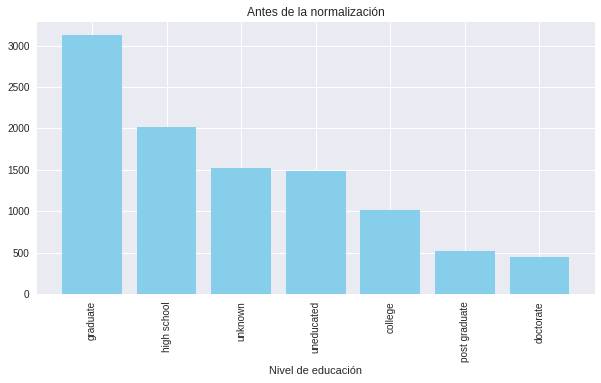

In [ ]:
barras(df,"v_Education_Level","Antes de la normalización",x_title="Nivel de educación", color ='skyblue', large=10,width=5, rot=90 )

In [ ]:
lista = ["graduate", "college"]

In [ ]:
reetiquetado(df, "v_Education_Level", lista, "graduate")

In [ ]:
lista = ["post graduate", "doctorate"]

In [ ]:
reetiquetado(df, "v_Education_Level", lista, "post graduate")

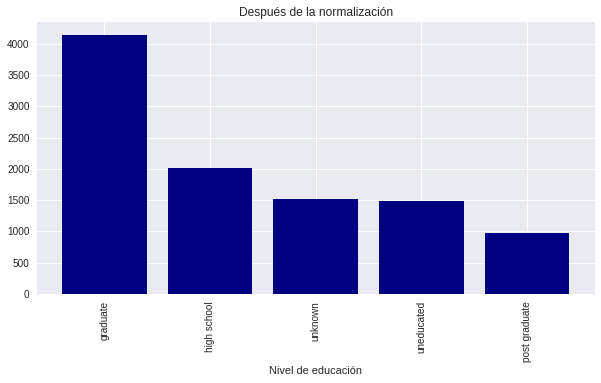

In [ ]:
barras(df,"v_Education_Level","Después de la normalización",x_title="Nivel de educación", color ='navy', large=10,width=5, rot=90 )

In [ ]:
df_model = df.copy()

# Análisis exploratorio

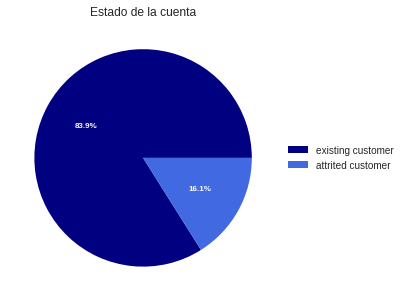

In [ ]:
pie(df, "v_Attrition_Flag", title = "Estado de la cuenta", color = ["navy", "royalblue"])

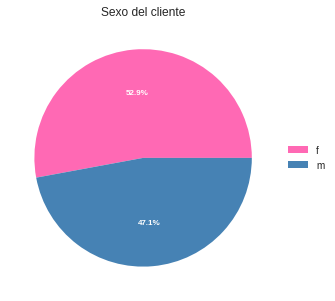

In [ ]:
pie(df, "v_Gender", title="Sexo del cliente", color = ["hotpink", "steelblue"])

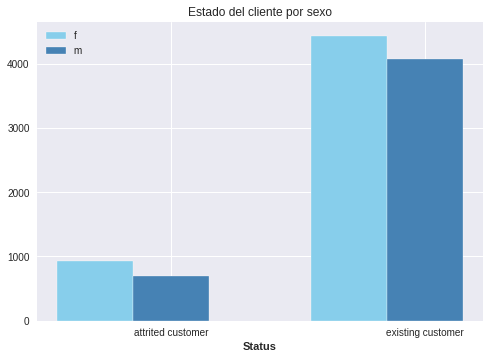

In [ ]:
barplot_relacional(df,"v_Attrition_Flag", "v_Gender", bar_width=0.3, color =["skyblue","steelblue"], xlabel= "Status", title="Estado del cliente por sexo")

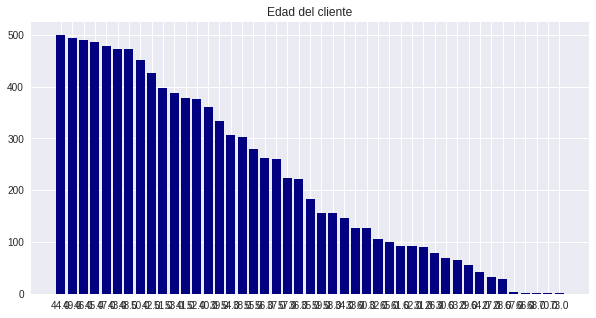

In [ ]:
barras(df, "c_Customer_Age", "Edad del cliente", color="navy")

In [ ]:
df["c_Customer_Age"].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: c_Customer_Age, dtype: float64

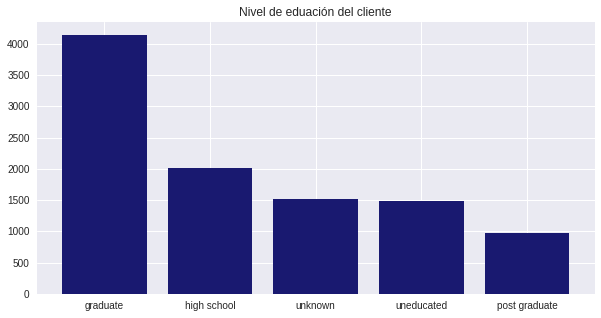

In [ ]:
barras(df, "v_Education_Level", "Nivel de eduación del cliente", color = "midnightblue")

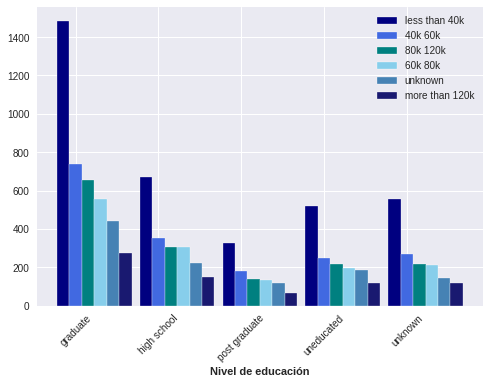

In [ ]:
barplot_relacional(df, "v_Education_Level", "v_Income_Category", bar_width=0.15, color =  ["navy", "royalblue", "teal", "skyblue", "steelblue","midnightblue"], xlabel="Nivel de educación", rot=45)

In [ ]:
df.groupby(["v_Education_Level", "v_Income_Category"])["v_Income_Category"].count()

v_Education_Level  v_Income_Category
graduate           40k 60k               736
                   60k 80k               554
                   80k 120k              653
                   less than 40k        1484
                   more than 120k        274
                   unknown               440
high school        40k 60k               355
                   60k 80k               307
                   80k 120k              308
                   less than 40k         671
                   more than 120k        147
                   unknown               225
post graduate      40k 60k               181
                   60k 80k               136
                   80k 120k              138
                   less than 40k         328
                   more than 120k         67
                   unknown               117
uneducated         40k 60k               249
                   60k 80k               195
                   80k 120k              217
                  

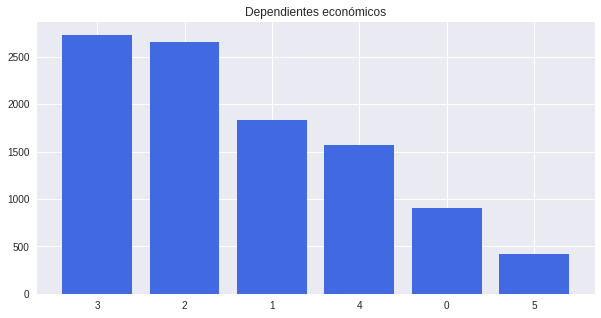

In [ ]:
barras(df, "v_Dependent_count", "Dependientes económicos", color = "royalblue")

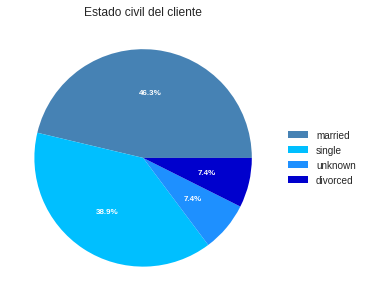

In [ ]:
pie(df, "v_Marital_Status", title="Estado civil del cliente", color = ["steelblue", "deepskyblue", "dodgerblue", "mediumblue"])

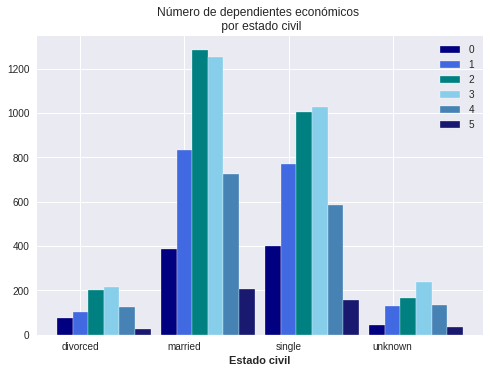

In [ ]:
barplot_relacional(df,"v_Marital_Status", "v_Dependent_count",  color= ["navy", "royalblue", "teal", "skyblue", "steelblue","midnightblue"], xlabel='Estado civil', title= "Número de dependientes económicos \n por estado civil", subcat=0)

In [ ]:
df["v_Marital_Status"].value_counts(1)

married     0.462822
single      0.389355
unknown     0.073961
divorced    0.073862
Name: v_Marital_Status, dtype: float64

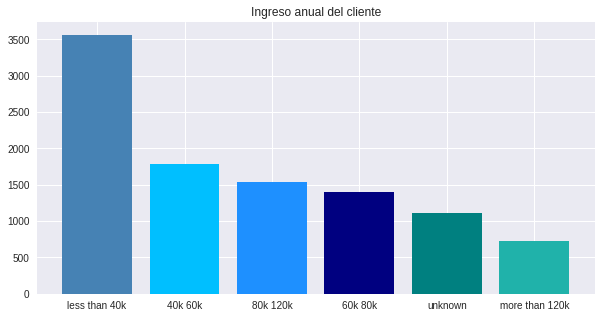

In [ ]:
barras(df, "v_Income_Category", "Ingreso anual del cliente",
       color =["steelblue", "deepskyblue", "dodgerblue", "navy", "teal", "lightseagreen"] )

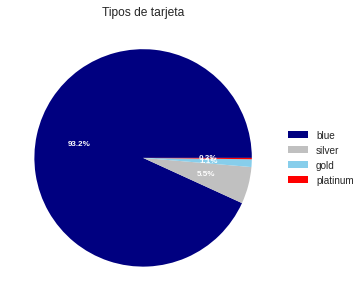

In [ ]:
pie(df, "v_Card_Category", title="Tipos de tarjeta", color=["navy", "silver","skyblue", "red"])

In [ ]:
df["v_Attrition_Flag"].value_counts(1)*100

existing customer    83.934038
attrited customer    16.065962
Name: v_Attrition_Flag, dtype: float64

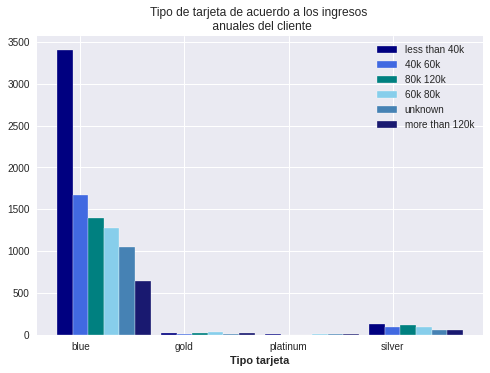

In [ ]:
barplot_relacional(df, "v_Card_Category","v_Income_Category", color=["navy", "royalblue", "teal", "skyblue", "steelblue","midnightblue"], xlabel="Tipo tarjeta", title="Tipo de tarjeta de acuerdo a los ingresos \n anuales del cliente")

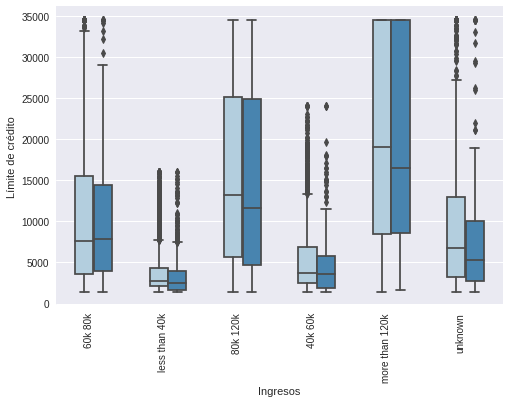

In [ ]:
sns.boxplot(x="v_Income_Category", y="c_Credit_Limit", hue="v_Attrition_Flag", data=df, palette="Blues", width=0.5).set(
    xlabel='Ingresos',
    ylabel='Límite de crédito')
plt.xticks(rotation=90, ha='right')
plt.legend([],[], frameon=False)
plt.show()

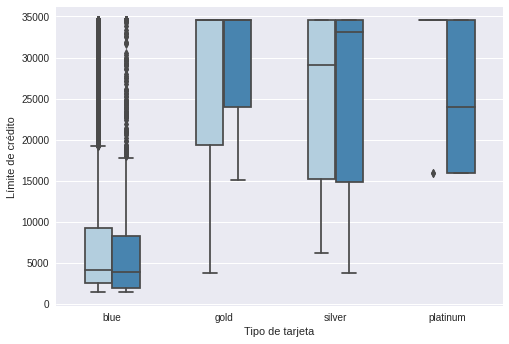

In [ ]:
sns.boxplot(x="v_Card_Category", y="c_Credit_Limit", hue="v_Attrition_Flag", data=df, palette="Blues", width=0.5).set(
    xlabel='Tipo de tarjeta',
    ylabel='Límite de crédito')
plt.legend([],[], frameon=False)
plt.show()

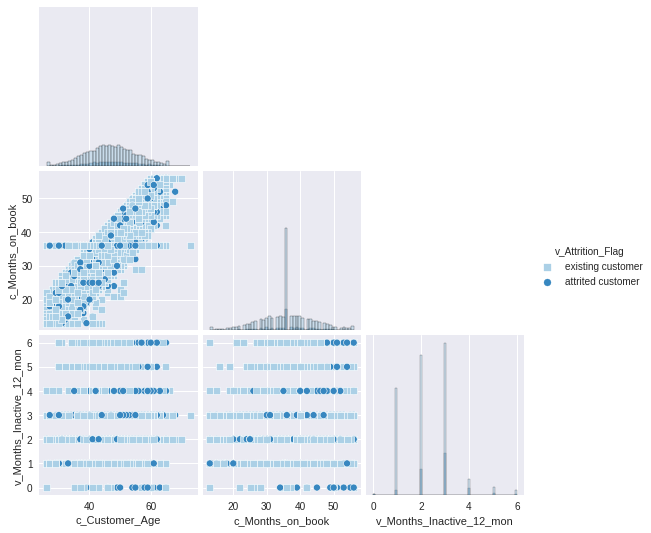

In [ ]:
df1= df[["v_Attrition_Flag", 'c_Customer_Age', 'c_Months_on_book', 'v_Months_Inactive_12_mon']]
sns.pairplot(df1, kind="scatter", hue="v_Attrition_Flag",  corner="True", diag_kind="hist", markers=["s", "o"], palette="Blues")
plt.show()

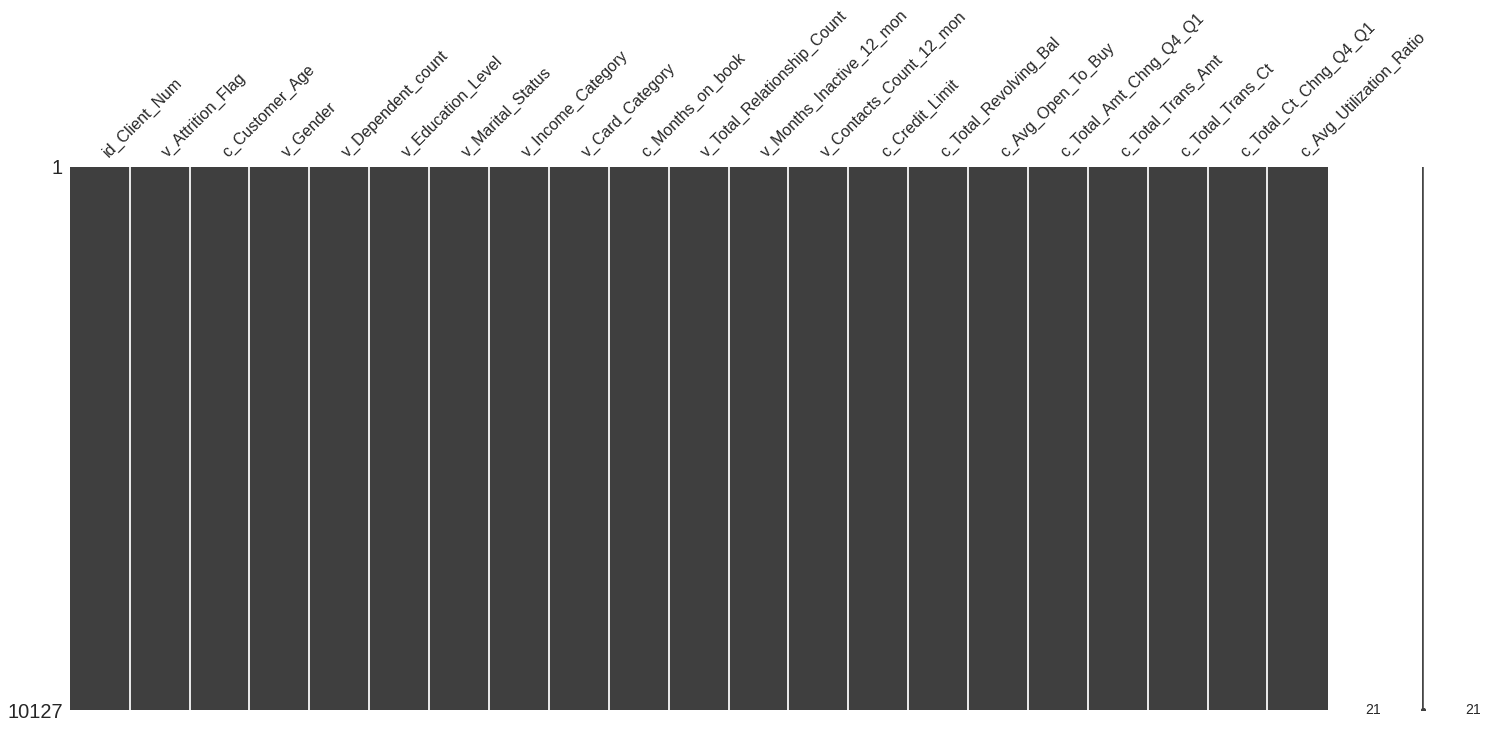

In [ ]:
msno.matrix(df)

# Enfoque 1

Este enfoque tratará a los datos de la manera "tradicional", es decir, revisaré casos de valores atípicos, realizaré ingeniería de variables y reduciré la dimensión de la matriz por dos métodos, filtro de alta correlación y multicolinealidad.

In [ ]:
#POR SI LAS FLIES
df2= df.copy()

In [ ]:
df2.columns

Index(['id_Client_Num', 'v_Attrition_Flag', 'c_Customer_Age', 'v_Gender',
       'v_Dependent_count', 'v_Education_Level', 'v_Marital_Status',
       'v_Income_Category', 'v_Card_Category', 'c_Months_on_book',
       'v_Total_Relationship_Count', 'v_Months_Inactive_12_mon',
       'v_Contacts_Count_12_mon', 'c_Credit_Limit', 'c_Total_Revolving_Bal',
       'c_Avg_Open_To_Buy', 'c_Total_Amt_Chng_Q4_Q1', 'c_Total_Trans_Amt',
       'c_Total_Trans_Ct', 'c_Total_Ct_Chng_Q4_Q1', 'c_Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df2[['c_Credit_Limit','c_Avg_Open_To_Buy']].describe()

,c_Credit_Limit,c_Avg_Open_To_Buy
count,10127.000000,10127.000000
mean,8631.953698,7469.139637
std,9088.776650,9090.685324
min,1438.300000,3.000000
25%,2555.000000,1324.500000
50%,4549.000000,3474.000000
75%,11067.500000,9859.000000
max,34516.000000,34516.000000


## Outliers

Puedo identificar valores atípicos en variables continuas, pues de las categóricas ya las he normalizado.

In [ ]:
cols=list(df.filter(like= "c_").columns)

### Análisis univariado

In [ ]:
results, limInf_iqr, limSup_iqr,limInf_perc, limSup_perc= OUTLIERS(df, cols)

In [ ]:
results

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_IQR_%,n_outliers_Percentil_%,total_outliers,%_outliers,indices
0,c_Customer_Age,2,867,0.02,8.56,2,0.02,"[251, 254]"
1,c_Months_on_book,386,884,3.81,8.73,386,3.81,"[11, 18, 27, 39, 2088, 2090, 2094, 2099, 52, 2..."
2,c_Credit_Limit,984,507,9.72,5.01,0,0.00,[]
3,c_Total_Revolving_Bal,0,0,0.00,0.00,0,0.00,[]
4,c_Avg_Open_To_Buy,963,1014,9.51,10.01,507,5.01,"[6, 4108, 4111, 4134, 45, 8248, 61, 65, 4165, ..."
5,c_Total_Amt_Chng_Q4_Q1,396,1006,3.91,9.93,396,3.91,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2055, 11, 12, 1..."
6,c_Total_Trans_Amt,896,1013,8.85,10.00,506,5.00,"[9106, 9125, 9138, 9143, 9145, 9147, 9148, 915..."
7,c_Total_Trans_Ct,2,966,0.02,9.54,2,0.02,"[9586, 9324]"
8,c_Total_Ct_Chng_Q4_Q1,394,1004,3.89,9.91,394,3.89,"[0, 1, 2, 3, 4, 8, 11, 12, 13, 15, 17, 22, 411..."
9,c_Avg_Utilization_Ratio,0,497,0.00,4.91,0,0.00,[]


#### Antes de eliminar outliers

In [ ]:
X_train,X_test=train_test_split(df,test_size=.2,random_state=0)

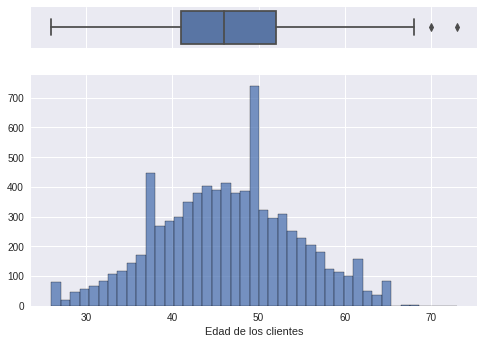

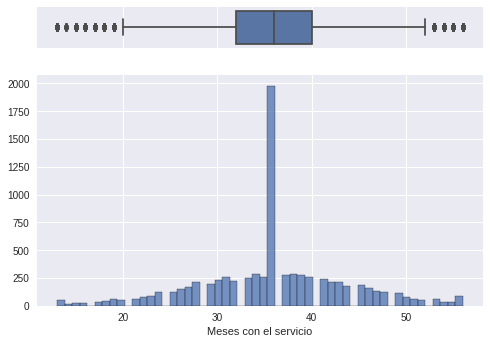

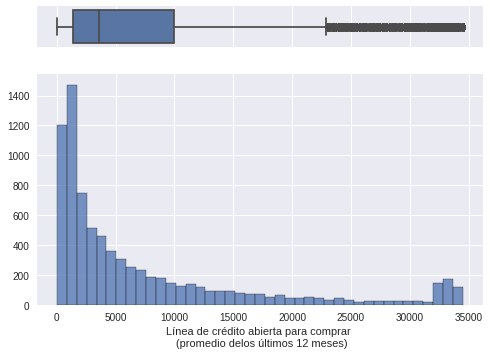

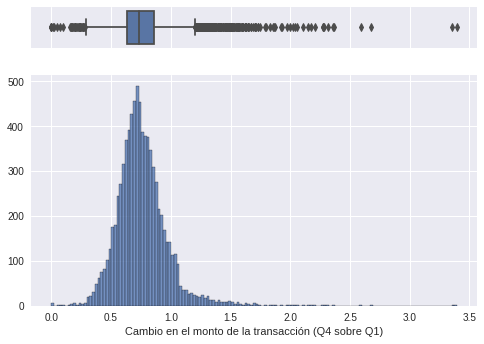

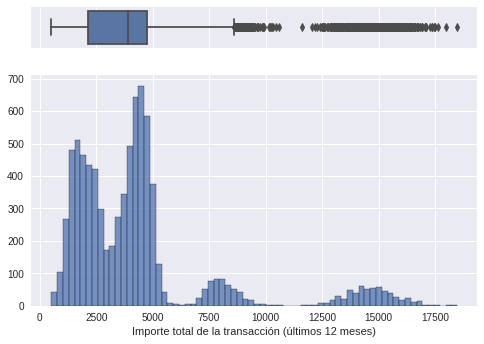

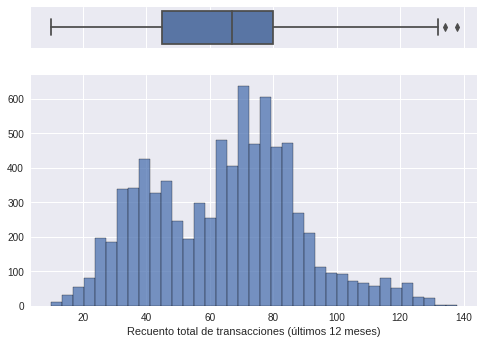

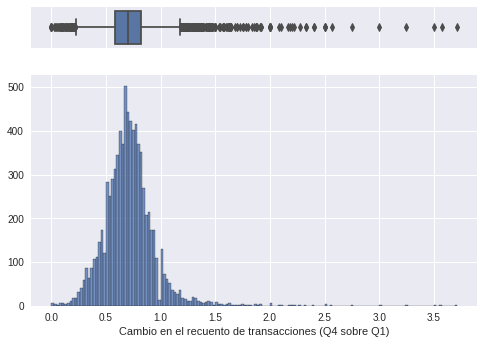

In [ ]:
histograma(X_train, "c_Customer_Age", "Edad de los clientes")
histograma(X_train, "c_Months_on_book", "Meses con el servicio")
histograma(X_train, "c_Avg_Open_To_Buy", "Línea de crédito abierta para comprar \n (promedio delos últimos 12 meses)")
histograma(X_train, "c_Total_Amt_Chng_Q4_Q1", "Cambio en el monto de la transacción (Q4 sobre Q1)")
histograma(X_train, "c_Total_Trans_Amt", "Importe total de la transacción (últimos 12 meses)")
histograma(X_train, "c_Total_Trans_Ct", "Recuento total de transacciones (últimos 12 meses)")
histograma(X_train, "c_Total_Ct_Chng_Q4_Q1", "Cambio en el recuento de transacciones (Q4 sobre Q1)")

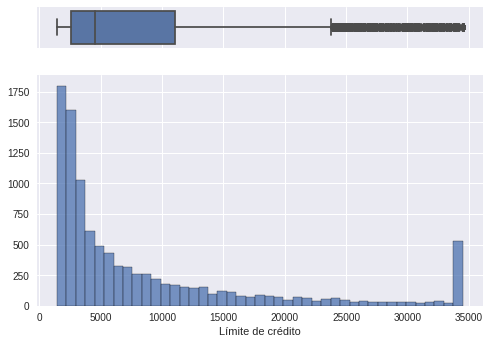

In [ ]:
# Para comparar con c_Avg_Open_To_Buy
histograma(df,"c_Credit_Limit", "Límite de crédito")

In [ ]:
aux=pd.DataFrame()
aux["limIndIQR"] = limInf_iqr
aux["limSupIQR"] = limSup_iqr
aux["limInfPerc"] = limInf_perc
aux["limSupPerc"] = limSup_perc

In [ ]:
aux

,limIndIQR,limSupIQR,limInfPerc,limSupPerc
0,24.50,68.50,33.00,60.00
1,17.50,53.50,22.00,50.00
2,-10213.75,23836.25,1438.51,34516.00
3,-1778.50,3921.50,0.00,2517.00
4,-11477.25,22660.75,480.30,32183.40
5,0.29,1.20,0.46,1.10
6,-1722.75,8619.25,1283.30,14212.00
7,-9.00,135.00,28.00,105.00
8,0.23,1.17,0.37,1.07
9,-0.70,1.22,0.00,0.79


In [ ]:
indices=list(results["indices"].values)

indices=list(set(reduce(lambda x,y: x+y, indices)))

In [ ]:
len(indices)/df.shape[0]

0.1911721141502913

Si eliminamos todos los outliers, estaríamos perdiendo el 19.12% de nuestros datos, un porcentaje importante que podría ofrecernos información; por ello, conservaré aquellas variables cuyos datos son posibles/reales, y eliminaré los valores dispersos.

In [ ]:
aux=list(results.iloc[[5,6,8]]["indices"])
indices=list(set(reduce(lambda x,y: x+y, aux)))

In [ ]:
# Pocentaje que es cosiderado como outlier después de descartar ciertas variables
len(indices)/df.shape[0]

0.117013923175669

#### Después de imputar/eliminar outliers

In [ ]:
aux1=list(results.iloc[5]["indices"])
test, X_train, X_test=imputar_outliers(X_train, X_test, aux1, "c_Total_Amt_Chng_Q4_Q1")
test

'mean:0.08432267569779073 / median:0.10862482492960968 / mode:0.07447036320381839'

In [ ]:
imputacion(X_train, X_test, "c_Total_Amt_Chng_Q4_Q1", "median")

In [ ]:
aux1=list(results.iloc[6]["indices"])
test, X_train, X_test=imputar_outliers(X_train, X_test, aux1, "c_Total_Trans_Amt")
test

'mean:0.012080216397325927 / median:0.01554990790723254 / mode:0.000892982822984667'

In [ ]:
imputacion(X_train, X_test, "c_Total_Trans_Amt", "median")

In [ ]:
aux1=list(results.iloc[8]["indices"])
test, X_train, X_test=imputar_outliers(X_train, X_test, aux1, "c_Total_Ct_Chng_Q4_Q1")
test

'mean:0.09217472973514562 / median:0.10155500166971032 / mode:0.04763064446048115'

In [ ]:
imputacion(X_train, X_test, "c_Total_Ct_Chng_Q4_Q1", "median")

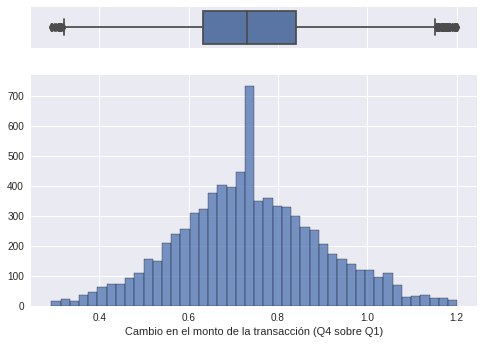

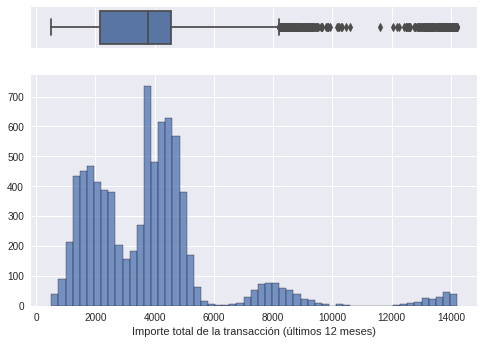

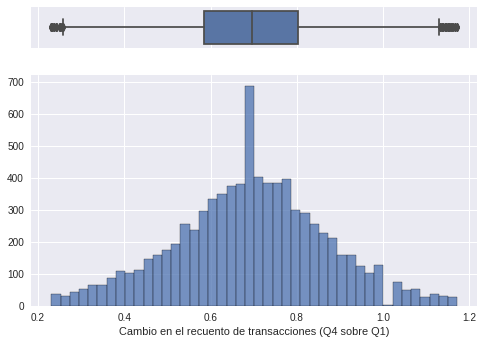

In [ ]:
histograma(X_train, "c_Total_Amt_Chng_Q4_Q1", "Cambio en el monto de la transacción (Q4 sobre Q1)")
histograma(X_train, "c_Total_Trans_Amt", "Importe total de la transacción (últimos 12 meses)")
histograma(X_train, "c_Total_Ct_Chng_Q4_Q1", "Cambio en el recuento de transacciones (Q4 sobre Q1)")

A partir de ahora trabajaré sobre X_train y X_test.

### Análisis multivariado

In [ ]:
X_train2,X_test2=train_test_split(df,test_size=.2,random_state=0)

In [ ]:
# Buscamos outliers en las variables donde vemos congruente la existencia de valores atípicos
cols2=["c_Total_Amt_Chng_Q4_Q1", "c_Total_Trans_Amt", "c_Total_Ct_Chng_Q4_Q1"]

In [ ]:
max_features=X_train2[cols2].shape[1]
#The number of features to draw from X to train each base estimator.
n_estimators=3
#The number of base estimators in the ensemble.
max_samples='auto'
contamination=float(0.1)
#The amount of contamination of the data set, i.e. the proportion of outliers in the data set
model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
model.fit(X_train2[cols2])

IsolationForest(contamination=0.1, max_features=3, n_estimators=3)

In [ ]:
X_train2["outlier"]=model.predict(X_train2[cols2])
X_test2["outlier"]=model.predict(X_test2[cols2])

In [ ]:
X_train2["outlier"].value_counts(1)*100

 1    90.025923
-1     9.974077
Name: outlier, dtype: float64

In [ ]:
X_test2["outlier"].value_counts(1)*100

 1    89.28924
-1    10.71076
Name: outlier, dtype: float64

In [ ]:
X_train2=X_train2[X_train2["outlier"]!=-1]
X_test2=X_test2[X_test2["outlier"]!=-1]

In [ ]:
X_train2.shape[0]-X_train.shape[0]

-808

In [ ]:
X_train[cols2].describe()

,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Ct_Chng_Q4_Q1
count,8101.000000,8101.000000,8101.000000
mean,0.737370,3813.862239,0.693237
std,0.161755,2307.142446,0.174848
min,0.293000,510.000000,0.231000
25%,0.632000,2143.000000,0.586000
50%,0.730000,3756.000000,0.696000
75%,0.840000,4561.000000,0.804000
max,1.201000,14212.000000,1.172000


In [ ]:
X_train2[cols2].describe()

,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Ct_Chng_Q4_Q1
count,7293.000000,7293.000000,7293.000000
mean,0.763604,4471.875086,0.705930
std,0.178133,3261.493955,0.188045
min,0.304000,510.000000,0.038000
25%,0.648000,2323.000000,0.591000
50%,0.743000,4003.000000,0.703000
75%,0.859000,4751.000000,0.812000
max,1.867000,18484.000000,2.083000


#### Después de imputar/eliminar outliers

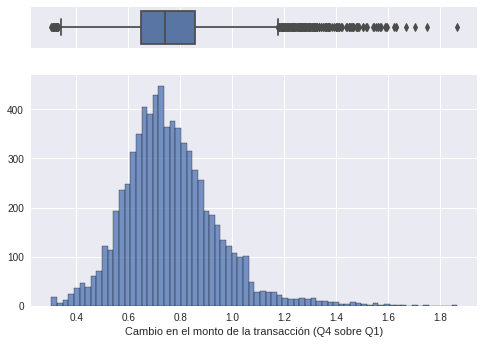

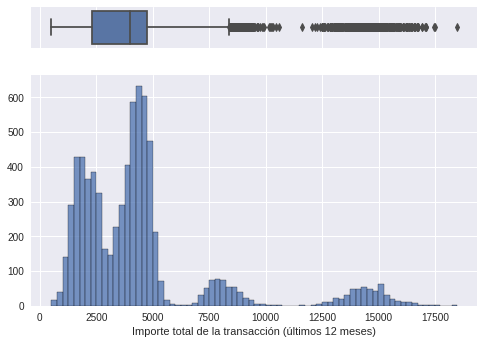

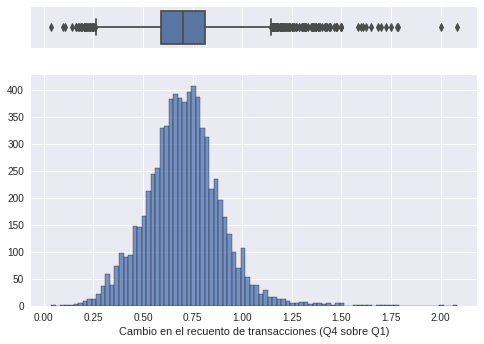

In [ ]:
histograma(X_train2, "c_Total_Amt_Chng_Q4_Q1", "Cambio en el monto de la transacción (Q4 sobre Q1)")
histograma(X_train2, "c_Total_Trans_Amt", "Importe total de la transacción (últimos 12 meses)")
histograma(X_train2, "c_Total_Ct_Chng_Q4_Q1", "Cambio en el recuento de transacciones (Q4 sobre Q1)")

A partir de ahora trabajaré sobre X_train y X_test que son una copia de las variables sin outliers por detercción multivariada

In [ ]:
X_train= X_train2.copy()
X_test = X_test2.copy()

## Ingenieria de variables

### Categoricas

In [ ]:
#Usaré estos DF auxiliares para calcular multicolinealidad
X_train_aux = X_train.copy()
X_test_aux = X_test.copy()

In [ ]:
#One-hot encoding
X_train["v_Attrition_Flag"] = X_train["v_Attrition_Flag"].map(lambda x: 1 if x=="existing customer" else 0)
X_test["v_Attrition_Flag"] = X_test["v_Attrition_Flag"].map(lambda x: 1 if x=="existing customer" else 0)

In [ ]:
X_train["v_Gender"] = X_train["v_Gender"].map(lambda x: 1 if x=="f" else 0)
X_test["v_Gender"] = X_test["v_Gender"].map(lambda x: 1 if x=="f" else 0)

In [ ]:
# Codificación ordinal
diccionario = {"unknown": 0,"less than 40k":1, "40k 60k":2, "60k 80k":3, "80k 120k":4, "more than 120k":5}
X_train["v_Income_Category"] = X_train["v_Income_Category"].map(diccionario)
X_test["v_Income_Category"] = X_test["v_Income_Category"].map(diccionario)

In [ ]:
# Count encoding
X_train["v_Education_Level"] = X_train["v_Education_Level"].map(X_train["v_Education_Level"].value_counts().to_dict())
X_test["v_Education_Level"] = X_test["v_Education_Level"].map(X_test["v_Education_Level"].value_counts().to_dict())

In [ ]:

X_train["v_Marital_Status"] = X_train["v_Marital_Status"].map(X_train["v_Marital_Status"].value_counts().to_dict())
X_test["v_Marital_Status"] = X_test["v_Marital_Status"].map(X_test["v_Marital_Status"].value_counts().to_dict())

In [ ]:
X_train["v_Card_Category"] = X_train["v_Card_Category"].map(X_train["v_Card_Category"].value_counts().to_dict())
X_test["v_Card_Category"] = X_test["v_Card_Category"].map(X_test["v_Card_Category"].value_counts().to_dict())

## Reducción de dimensionalidad


#### Filtro de alta correlación


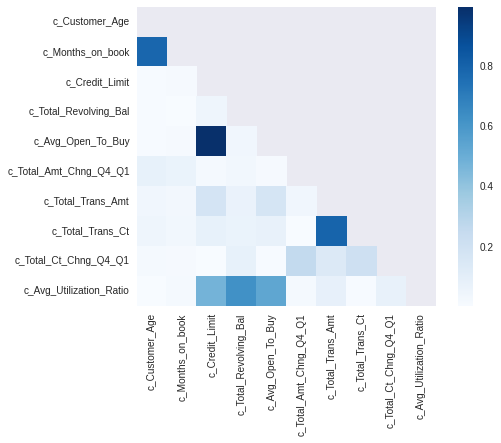

In [ ]:
aux=list(X_train.filter(like= "c_").columns)

# Calcula l correlación entre cada variable
corr_matrix=abs(X_train[aux].corr())

# Genra una "máscara" para ocultar la parte superior del plot
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Hacemos l gráfico de calor que captura la correlación de las variables
sns.heatmap(corr_matrix, mask=mask, square=True, cmap="Blues")

In [ ]:
aux = pd.DataFrame(abs(corr_matrix))

In [ ]:
aux[aux["c_Customer_Age"]>0.7]["c_Months_on_book"]

c_Customer_Age      0.788009
c_Months_on_book    1.000000
Name: c_Months_on_book, dtype: float64

In [ ]:
aux["c_Customer_Age"].sum()

1.9984426705544096

In [ ]:
aux["c_Months_on_book"].sum()

1.9854089363258558

In [ ]:
aux[aux["c_Credit_Limit"]>0.7]["c_Credit_Limit"]

c_Credit_Limit       1.000000
c_Avg_Open_To_Buy    0.995948
Name: c_Credit_Limit, dtype: float64

In [ ]:
aux["c_Credit_Limit"].sum()

2.829673547165947

In [ ]:
aux["c_Avg_Open_To_Buy"].sum()

2.8675133326108893

Quitaré c_Customer_Age que está correlacionada con c_Months_on_book, sin embargo la edad está un poco más correlacionada con el resto de variables.

Quitaré c_Avg_Open_To_Buy  que está correlacionada con c_Credit_Limit y con el resto de variables en un nivel mayor.

In [ ]:
aux[aux["c_Total_Trans_Amt"]>0.7]["c_Total_Trans_Amt"]

c_Total_Trans_Amt    1.00000
c_Total_Trans_Ct     0.79717
Name: c_Total_Trans_Amt, dtype: float64

In [ ]:
aux["c_Total_Trans_Amt"].sum()

2.54645066022221

In [ ]:
aux["c_Total_Trans_Ct"].sum()

2.3200327883693297

Quitaré c_Total_Trans_Amt  que está correlacionada con c_Total_Trans_Ct y con el resto de variables en un nivel mayor.

Fuí eliminando variable a variable y al final resultó que debía eliminar las seiguientes cuatro variables:

In [ ]:
lista = ["c_Customer_Age", "c_Avg_Open_To_Buy", "c_Total_Trans_Amt"]

In [ ]:
X_train.drop(columns = lista, inplace=True)
X_test.drop(columns = lista, inplace=True)

### Multicolinealidad

#### Numéricas

In [ ]:
vif=calc_vif(X_train[[x for x in X_train.filter(like="c_")]])
vif[vif["VIF"]>10].sort_values(by=["variables","VIF"],ascending=False)

,variables,VIF
5,c_Total_Ct_Chng_Q4_Q1,15.871848
3,c_Total_Amt_Chng_Q4_Q1,15.686941
0,c_Months_on_book,12.724264


Eliminaré la variable con mayor VIF, es decir, c_Total_Amt_Chng_Q4_Q1; y vuelvo a calcular la métrica.

In [ ]:
X_train.drop(columns = "c_Total_Ct_Chng_Q4_Q1", inplace=True)
X_test.drop(columns = "c_Total_Ct_Chng_Q4_Q1", inplace=True)

In [ ]:
vif=calc_vif(X_train[[x for x in X_train.filter(like="c_")]])
vif[vif["VIF"]>10].sort_values(by=["variables","VIF"],ascending=False)

,variables,VIF
3,c_Total_Amt_Chng_Q4_Q1,12.165914
0,c_Months_on_book,11.997744


In [ ]:
X_train.drop(columns = ["c_Total_Amt_Chng_Q4_Q1","outlier"], inplace=True)
X_test.drop(columns = ["c_Total_Amt_Chng_Q4_Q1", "outlier"], inplace=True)

In [ ]:
vif=calc_vif(X_train[[x for x in X_train.filter(like="c_")]])
vif[vif["VIF"]>10].sort_values(by=["variables","VIF"],ascending=False)

,variables,VIF


#### Categóricas

Dado que la función que calcula la colinealidad de variables continuas, hace la ingenieria de one-hot encoding, tendremos que revertir la transformación que hicimos.

In [ ]:
results=multicolinealidad_cate(df=X_train_aux[list(X_train_aux.filter(like="v_").columns)],y="v_Attrition_Flag")

In [ ]:
results

,GVIF,Df,GVIF^(1/2Df),VIF
factor,,,,
v_Gender,3.460743,1,1.860307,3.460743
v_Dependent_count,1.019994,1,1.009948,1.019994
v_Education_Level,1.009326,4,1.001161,1.002323
v_Marital_Status,1.013162,3,1.002182,1.004368
v_Income_Category,3.510238,5,1.133793,1.285486
v_Card_Category,1.030497,3,1.005019,1.010064
v_Total_Relationship_Count,1.018480,1,1.009198,1.018480
v_Months_Inactive_12_mon,1.004064,1,1.002030,1.004064
v_Contacts_Count_12_mon,1.010571,1,1.005272,1.010571


## Datos finales

In [ ]:
X_train.rename(columns={"v_Attrition_Flag":"tgt_Attrition_Flag"}, inplace=True)

In [ ]:
y_train = X_train["tgt_Attrition_Flag"]

In [ ]:
lista = [x for x in list(X_train.columns) if x not in ["tgt_Attrition_Flag", "id_Client_Num"]]
X_train = X_train[lista]

In [ ]:
X_train.head(10)

,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Total_Trans_Ct,c_Avg_Utilization_Ratio
147,0,2,2990,3281,5,6802,50.0,3,2,0,10916.0,1536.0,34.0,0.141
1985,0,0,2990,2913,0,6802,27.0,6,3,3,9238.0,0.0,68.0,0.000
8316,1,4,1064,3281,0,6802,25.0,2,3,2,3379.0,587.0,80.0,0.174
2841,1,2,1112,3281,1,6802,36.0,3,1,1,5093.0,2376.0,57.0,0.467
5824,1,4,1419,3281,2,6802,36.0,5,2,1,2948.0,2232.0,79.0,0.757
5301,1,3,1064,554,0,6802,36.0,4,3,3,2809.0,0.0,40.0,0.000
6450,0,3,1419,3281,4,6802,22.0,5,3,2,9094.0,0.0,76.0,0.000
7509,0,2,1419,2913,2,6802,31.0,5,1,1,2197.0,0.0,64.0,0.000
1002,0,4,2990,3281,3,6802,24.0,3,5,4,6231.0,0.0,30.0,0.000
460,1,0,2990,2913,1,6802,46.0,4,1,2,3044.0,1611.0,36.0,0.529


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7293 entries, 147 to 2732
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   v_Gender                    7293 non-null   int64  
 1   v_Dependent_count           7293 non-null   int64  
 2   v_Education_Level           7293 non-null   int64  
 3   v_Marital_Status            7293 non-null   int64  
 4   v_Income_Category           7293 non-null   int64  
 5   v_Card_Category             7293 non-null   int64  
 6   c_Months_on_book            7293 non-null   float64
 7   v_Total_Relationship_Count  7293 non-null   int64  
 8   v_Months_Inactive_12_mon    7293 non-null   int64  
 9   v_Contacts_Count_12_mon     7293 non-null   int64  
 10  c_Credit_Limit              7293 non-null   float64
 11  c_Total_Revolving_Bal       7293 non-null   float64
 12  c_Total_Trans_Ct            7293 non-null   float64
 13  c_Avg_Utilization_Ratio     729

In [ ]:
X_test.rename(columns={"v_Attrition_Flag":"tgt_Attrition_Flag"}, inplace=True)

In [ ]:
y_test = X_test["tgt_Attrition_Flag"]

In [ ]:
lista = [x for x in list(X_test.columns) if x not in ["tgt_Attrition_Flag", "id_Client_Num"]]
X_test = X_test[lista]

In [ ]:
X_test.head(10)

,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Total_Trans_Ct,c_Avg_Utilization_Ratio
3358,0,5,274,127,3,1685,39.0,5,2,0,16034.0,1597.0,59.0,0.100
9951,1,3,255,719,0,1685,34.0,2,3,3,26021.0,0.0,60.0,0.000
3848,1,3,377,719,1,1685,26.0,3,1,2,2917.0,2216.0,67.0,0.760
1666,0,1,736,811,2,1685,36.0,6,2,3,3735.0,1285.0,33.0,0.344
8383,1,4,377,719,1,1685,33.0,2,4,3,3068.0,2071.0,71.0,0.675
3184,1,2,274,719,1,1685,36.0,5,3,2,1721.0,1037.0,57.0,0.603
6474,0,3,274,811,2,1685,25.0,5,0,3,1438.3,0.0,77.0,0.000
2280,0,1,274,811,4,1685,36.0,6,1,1,9031.0,1535.0,35.0,0.170
4543,1,0,736,719,1,1685,45.0,3,6,2,2463.0,1621.0,70.0,0.658
8656,1,4,274,152,2,99,36.0,3,2,3,19704.0,0.0,81.0,0.000


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 3358 to 9651
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   v_Gender                    1809 non-null   int64  
 1   v_Dependent_count           1809 non-null   int64  
 2   v_Education_Level           1809 non-null   int64  
 3   v_Marital_Status            1809 non-null   int64  
 4   v_Income_Category           1809 non-null   int64  
 5   v_Card_Category             1809 non-null   int64  
 6   c_Months_on_book            1809 non-null   float64
 7   v_Total_Relationship_Count  1809 non-null   int64  
 8   v_Months_Inactive_12_mon    1809 non-null   int64  
 9   v_Contacts_Count_12_mon     1809 non-null   int64  
 10  c_Credit_Limit              1809 non-null   float64
 11  c_Total_Revolving_Bal       1809 non-null   float64
 12  c_Total_Trans_Ct            1809 non-null   float64
 13  c_Avg_Utilization_Ratio     18

## Reebalance de clases

In [ ]:
y_train.value_counts(1)*100

1    84.862197
0    15.137803
Name: tgt_Attrition_Flag, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.860697
0    0.139303
Name: tgt_Attrition_Flag, dtype: float64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
ran=RandomUnderSampler(random_state=121)
X_train_under, y_train_under= ran.fit_resample(X_train,y_train)

In [ ]:
y_train_under.value_counts()

0    1104
1    1104
Name: tgt_Attrition_Flag, dtype: int64

In [ ]:
evaluate_sampling(X_train_under,y_train_under,X_test,y_test)

Roc Validate: 0.88990
 F1 score Validate: 0.83772
[[ 219   33]
 [ 411 1146]]


In [ ]:
ran=RandomOverSampler(random_state =123)
X_train_over, y_train_over= ran.fit_resample(X_train,y_train)

In [ ]:
y_train_over.value_counts()

1    6189
0    6189
Name: tgt_Attrition_Flag, dtype: int64

In [ ]:
evaluate_sampling(X_train_over,y_train_over,X_test,y_test)

Roc Validate: 0.89147
 F1 score Validate: 0.86051
[[ 212   40]
 [ 351 1206]]


In [ ]:
?SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state =121)

In [ ]:
X_train_r, y_train_r = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_r.value_counts()

1    6189
0    6189
Name: tgt_Attrition_Flag, dtype: int64

In [ ]:
X_test_r, y_test_r = smote.fit_resample(X_test, y_test)

In [ ]:
y_test_r.value_counts(1)

1    0.5
0    0.5
Name: tgt_Attrition_Flag, dtype: float64

In [ ]:
# Elegimos éste
evaluate_sampling(X_test_r, y_test_r ,X_test,y_test)

Roc Validate: 0.87571
 F1 score Validate: 0.88675
[[ 192   60]
 [ 269 1288]]


# Enfoque 2

Dado que nuestra variable dependiente es dicotomica, puedo determinar qué variables son útiiles con transformación entrópica; para ello convertiiré la variable objetivo en tipo dummy (1 = existing customer, 0 = attrited customer ) e imputaré los datos considerando toda la muestra y no solo el conjunto de entrenamiento.

In [ ]:
df1=df.copy()

In [ ]:
df1["v_Attrition_Flag"] = df1["v_Attrition_Flag"].map(lambda x: 1 if x=="existing customer" else 0)

## Transformación entrópica

### De continuas a categóricas



In [ ]:
df1.shape

(10127, 21)

In [ ]:
cuts(df1, "c_Customer_Age", "v_Attrition_Flag", 4)
cuts(df1, "c_Months_on_book", "v_Attrition_Flag", 6)
cuts(df1, "c_Credit_Limit", "v_Attrition_Flag", 6)
cuts(df1, "c_Total_Revolving_Bal", "v_Attrition_Flag", 5)
cuts(df1, "c_Avg_Open_To_Buy", "v_Attrition_Flag", 6)
cuts(df1, "c_Total_Amt_Chng_Q4_Q1", "v_Attrition_Flag", 4)
cuts(df1, "c_Total_Trans_Amt", "v_Attrition_Flag", 5) #7
cuts(df1, "c_Total_Trans_Ct", "v_Attrition_Flag", 5)
cuts(df1, "c_Total_Ct_Chng_Q4_Q1", "v_Attrition_Flag", 4)
cuts(df1, "c_Avg_Utilization_Ratio", "v_Attrition_Flag", 3)


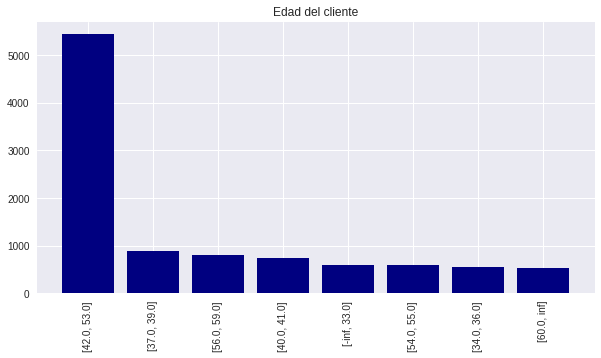

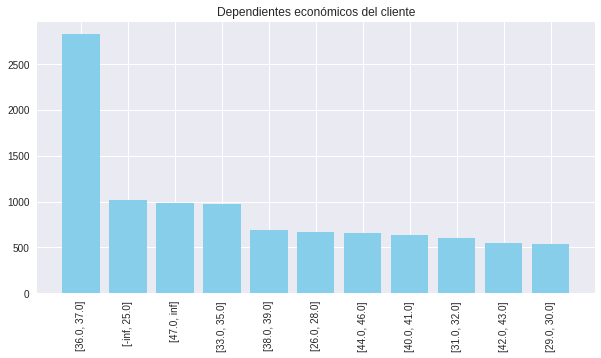

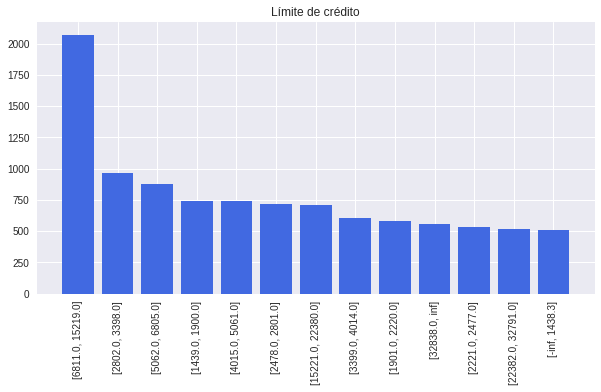

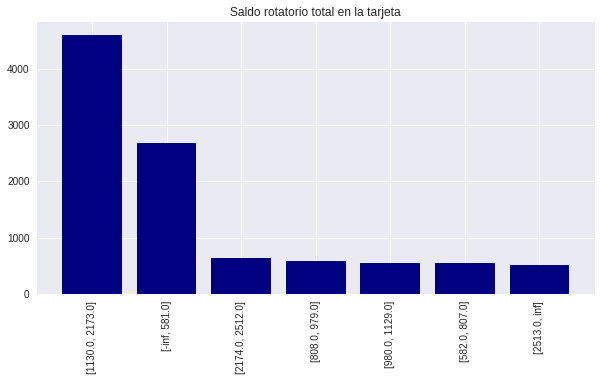

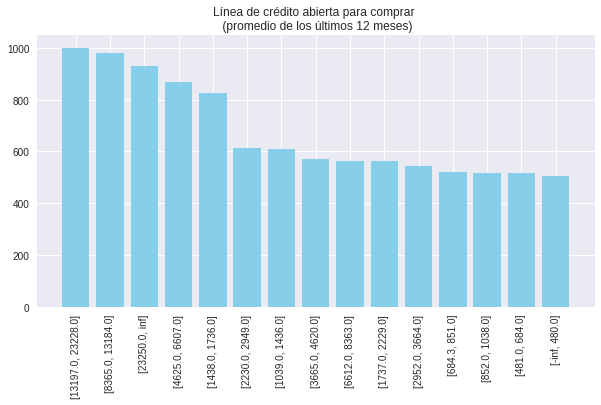

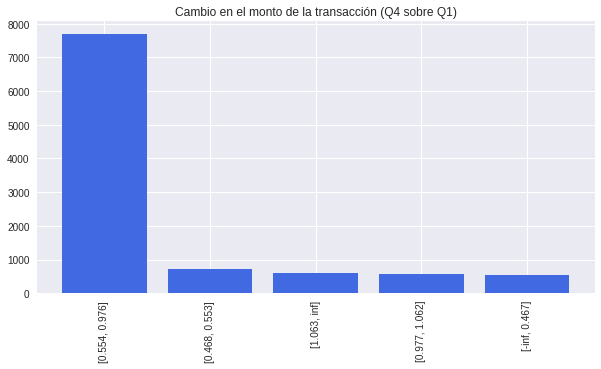

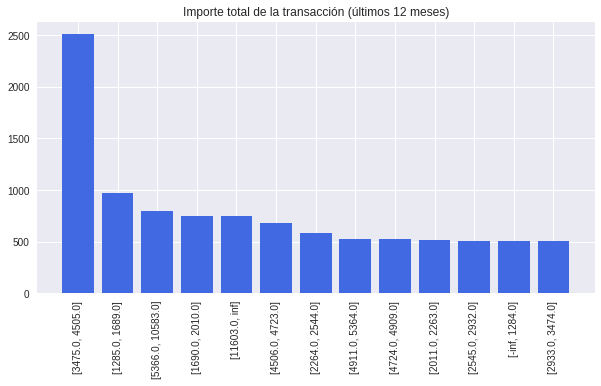

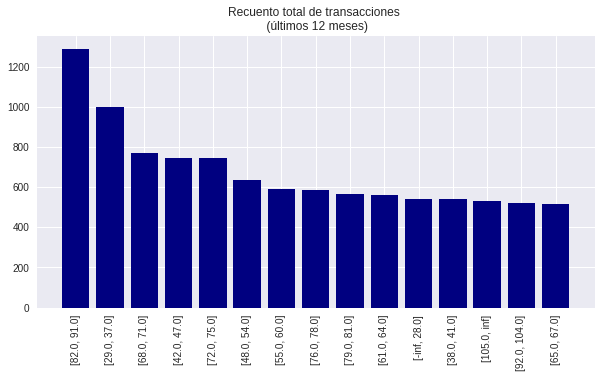

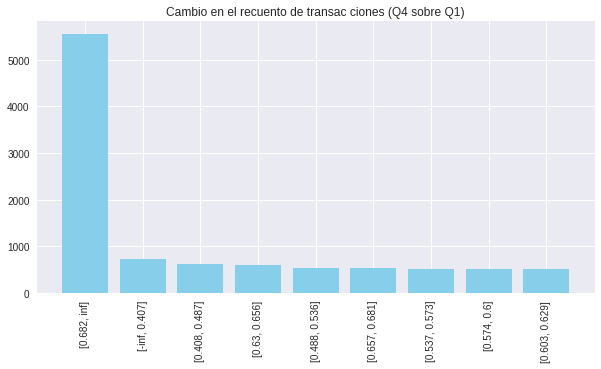

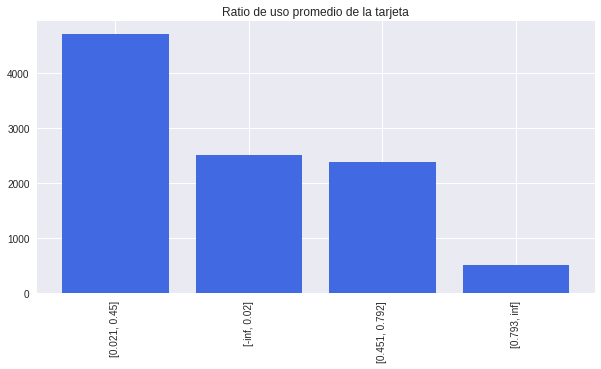

In [ ]:
# Observamos cómo se distribuyen las categorías
barras(df1, "v_tree_Customer_Age", "Edad del cliente", color="navy", rot=90)
barras(df1, "v_tree_Months_on_book", "Dependientes económicos del cliente", color="skyblue", rot=90)
barras(df1, "v_tree_Credit_Limit", "Límite de crédito", color="royalblue", rot=90)
barras(df1, "v_tree_Total_Revolving_Bal", "Saldo rotatorio total en la tarjeta", color="navy", rot=90)
barras(df1, "v_tree_Avg_Open_To_Buy", "Línea de crédito abierta para comprar \n (promedio de los últimos 12 meses)", color="skyblue", rot=90)
barras(df1, "v_tree_Total_Amt_Chng_Q4_Q1", "Cambio en el monto de la transacción (Q4 sobre Q1)", color="royalblue", rot=90)
barras(df1, "v_tree_Total_Trans_Amt", "Importe total de la transacción (últimos 12 meses)", color="royalblue", rot=90)
barras(df1, "v_tree_Total_Trans_Ct", "Recuento total de transacciones \n (últimos 12 meses)", color="navy", rot=90)
barras(df1, "v_tree_Total_Ct_Chng_Q4_Q1", "Cambio en el recuento de transac ciones (Q4 sobre Q1)", color="skyblue", rot=90)
barras(df1, "v_tree_Avg_Utilization_Ratio", "Ratio de uso promedio de la tarjeta", color="royalblue", rot=90)

In [ ]:
# Nos aseguramos que todas las categorías incluyan eventos (1) y no eventos (0)
for col in df1.filter(like="v_tree").columns:
  print(df1.groupby(col)["v_Attrition_Flag"].value_counts())

v_tree_Customer_Age  v_Attrition_Flag
[-inf, 33.0]         1                    507
                     0                     82
[34.0, 36.0]         1                    487
                     0                     64
[37.0, 39.0]         1                    764
                     0                    132
[40.0, 41.0]         1                    600
                     0                    140
[42.0, 53.0]         1                   4556
                     0                    878
[54.0, 55.0]         1                    466
                     0                    120
[56.0, 59.0]         1                    659
                     0                    140
[60.0, inf]          1                    461
                     0                     71
Name: v_Attrition_Flag, dtype: int64
v_tree_Months_on_book  v_Attrition_Flag
[-inf, 25.0]           1                    855
                       0                    157
[26.0, 28.0]           1                    577
     

In [ ]:
#Hacemos una copy de del DF que solo contenga variables categóricas y la variable objetivo
X = df1[list(df1.filter(like="v_").columns)]

In [ ]:
# Renombramos la variable objetivo
X.rename(columns={"v_Attrition_Flag":"tgt_Attrition_Flag"}, inplace=True)

In [ ]:
# Particionamos en conjunto prueba y conjunto de entrenamiento
# Agregamos stratify para indicar que queremos muestras "equilibradas" de acuerdo al target
X_train1,X_test1=train_test_split(X,test_size=.2,random_state=0)

In [ ]:
X_train1.shape

(8101, 20)

In [ ]:
# Evaluamos los IV para determinar que tan confiable es la variable.
data_iv, X_train1, X_test1=evaluacion(X_train1, X_test1,  X_train1.filter(like="v_").columns,"tgt_Attrition_Flag")

Revisaremos cómo son los pesos de cada variable para determinar si las categorías son adecuadas o necesitamos pensar en otras.

Verifiquemos que los WoE sean muy diferentes, de lo contrario debemos colapsar categorías de las variables numéricas.

v_tree_Avg_Utilization_Ratio
   v_tree_Customer_Age  W_v_tree_Customer_Age
1         [-inf, 33.0]               0.168723
2         [34.0, 36.0]               0.294534
5         [37.0, 39.0]               0.072265
3         [40.0, 41.0]              -0.247709
4         [42.0, 53.0]               0.012923
0         [54.0, 55.0]              -0.305938
10        [56.0, 59.0]              -0.112636
18         [60.0, inf]               0.238789


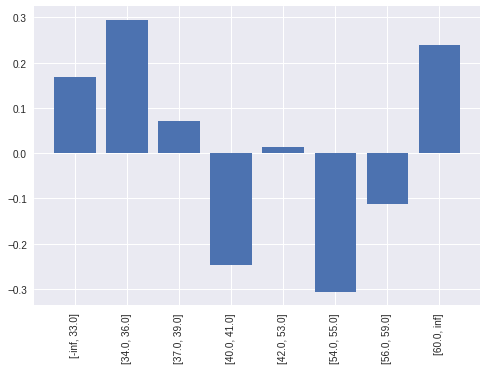

In [ ]:
# Categorías correctaa
evalua_categ(X_train1, "v_tree_Customer_Age", "W_v_tree_Customer_Age")

v_tree_Avg_Utilization_Ratio
    v_tree_Months_on_book  W_v_tree_Months_on_book
2            [-inf, 25.0]                -0.067852
1            [26.0, 28.0]                 0.245345
116          [29.0, 30.0]                -0.040039
7            [31.0, 32.0]                 0.281934
29           [33.0, 35.0]                 0.074675
3            [36.0, 37.0]                -0.095523
38           [38.0, 39.0]                -0.079086
39           [40.0, 41.0]                 0.049032
21           [42.0, 43.0]                 0.118459
10           [44.0, 46.0]                -0.108554
0             [47.0, inf]                 0.030157


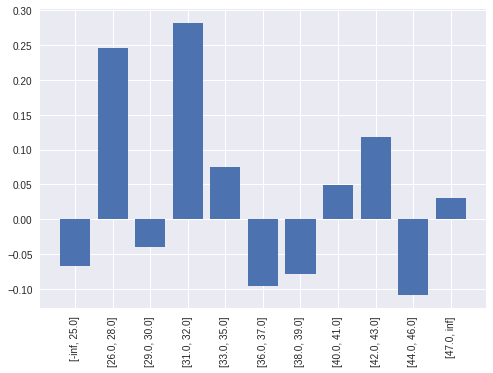

In [ ]:
# Categorías incorrectas
## Podemos colapsar [29.0, 30.0] y [31.0, 32.0], [36.0, 37.0] y [38.0, 39.0],
## [40.0, 41.0] , [42.0, 43.0], [44.0, 46.0], y[47.0, inf]
evalua_categ(X_train1, "v_tree_Months_on_book", "W_v_tree_Months_on_book")

Podemos colapsar pesos similares:

In [ ]:
new_lista = [
          [-np.inf, 25.0] ,
          [26.0, 28.0] ,
          [29.0, 32.0] ,
          [33.0, 35.0] ,
          [36.0, 39.0] ,
          [40.0,  np.inf]
]

In [ ]:
X_train1, aux = corrector_cat(df1, X_train1, new_lista,"c_Months_on_book", "tgt_Attrition_Flag")

In [ ]:
X_train1=corrector_cat_wgt(X_train1, "v_tree_Months_on_book", "W_v_tree_Months_on_book", "c_Months_on_book_aux", "W_c_Months_on_book_aux" )

v_tree_Avg_Utilization_Ratio
   v_tree_Months_on_book  W_v_tree_Months_on_book
4           [-inf, 25.0]                -0.099859
7           [26.0, 28.0]                -0.017693
10          [29.0, 32.0]                 0.001947
3           [33.0, 35.0]                 0.052714
0           [36.0, 39.0]                -0.036158
1            [40.0, inf]                 0.068772


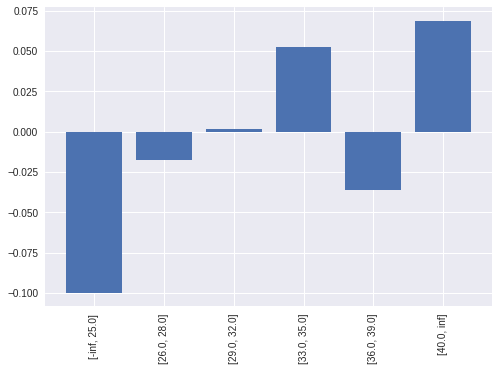

In [ ]:
# Categorías correctas
evalua_categ(X_train1, "v_tree_Months_on_book", "W_v_tree_Months_on_book")

v_tree_Avg_Utilization_Ratio
   v_tree_Credit_Limit  W_v_tree_Credit_Limit
37      [-inf, 1438.3]              -0.553251
14    [1439.0, 1900.0]              -0.902058
7     [1901.0, 2220.0]               0.161238
16    [2221.0, 2477.0]               0.251517
18    [2478.0, 2801.0]               0.936459
2     [2802.0, 3398.0]               0.257815
20    [3399.0, 4014.0]              -0.120587
11    [4015.0, 5061.0]              -0.247817
3     [5062.0, 6805.0]               0.259868
0    [6811.0, 15219.0]               0.033539
26  [15221.0, 22380.0]               0.507627
32  [22382.0, 32791.0]               0.133819
12      [32838.0, inf]              -0.121957


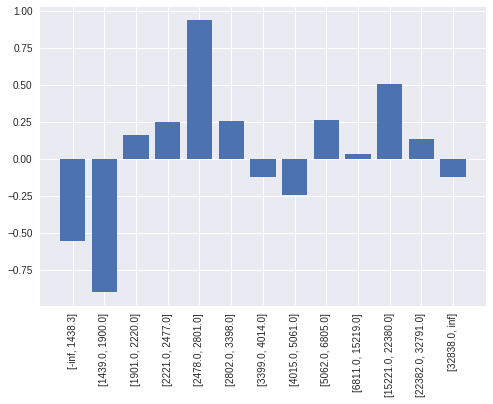

In [ ]:
# Categorías incorrectas
evalua_categ(X_train1, "v_tree_Credit_Limit", "W_v_tree_Credit_Limit")

In [ ]:
new_lista = [[-np.inf, 1438.3] ,
     [1439.0, 1900.0]       ,
    [1901.0, 2477.0]        ,
    [2478.0, 2801.0]        ,
    [2802.0, 3398.0]        ,
    [3399.0, 4014.0]        ,
    [4015.0, 5061.0]        ,
    [5062.0, 6805.0]        ,
    [6811.0, 15219.0]       ,
    [15221.0, 22380.0]      ,
    [22382.0, 32791.0]      ,
    [32838.0, np.inf]           ]

In [ ]:
X_train1, aux = corrector_cat(df1, X_train1, new_lista,"c_Credit_Limit", "tgt_Attrition_Flag")

In [ ]:
X_train1=corrector_cat_wgt(X_train1, "v_tree_Credit_Limit", "W_v_tree_Credit_Limit", "c_Credit_Limit_aux", "W_c_Credit_Limit_aux" )

v_tree_Avg_Utilization_Ratio
   v_tree_Credit_Limit  W_v_tree_Credit_Limit
21      [-inf, 1438.3]              -0.018662
68    [1439.0, 1900.0]               0.045242
8   [15221.0, 22380.0]               0.086692
14    [1901.0, 2477.0]               0.114144
7   [22382.0, 32791.0]              -0.208838
23    [2478.0, 2801.0]               0.106449
3     [2802.0, 3398.0]              -0.003993
6       [32838.0, inf]              -0.032720
2     [3399.0, 4014.0]              -0.120082
4     [4015.0, 5061.0]              -0.181446
10    [5062.0, 6805.0]               0.006701
0    [6811.0, 15219.0]               0.004931


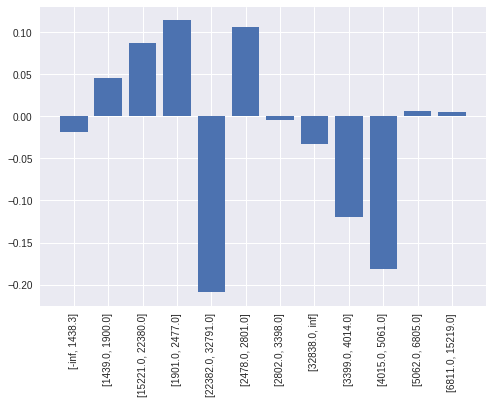

In [ ]:
# Categorías correctas
evalua_categ(X_train1, "v_tree_Credit_Limit", "W_v_tree_Credit_Limit")

v_tree_Avg_Utilization_Ratio
   v_tree_Total_Revolving_Bal  W_v_tree_Total_Revolving_Bal
1               [-inf, 581.0]                     -1.191358
2              [582.0, 807.0]                      0.724588
69             [808.0, 979.0]                      0.426609
30            [980.0, 1129.0]                      1.146707
0            [1130.0, 2173.0]                      1.435475
3            [2174.0, 2512.0]                      0.441137
40              [2513.0, inf]                     -0.884097


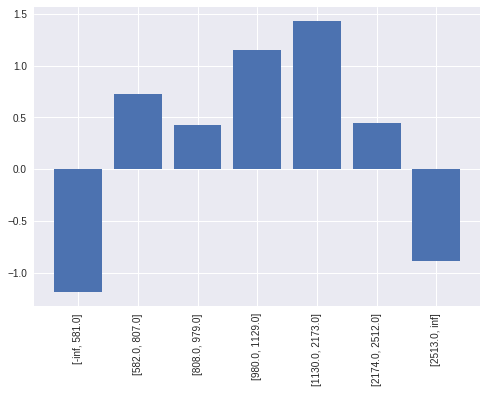

In [ ]:
# Categorías incorrectas
evalua_categ(X_train1, "v_tree_Total_Revolving_Bal", "W_v_tree_Total_Revolving_Bal")

In [ ]:
new_lista=[[-np.inf, 581.0]        ,
            [582.0, 979.0]      ,
            [980.0, 1129.0]     ,
            [1130.0,  2512.0]    ,
            [2513.0, np.inf] ]

In [ ]:
X_train1, aux = corrector_cat(df1, X_train1, new_lista,"c_Total_Revolving_Bal", "tgt_Attrition_Flag")

In [ ]:
X_train1=corrector_cat_wgt(X_train1, "v_tree_Total_Revolving_Bal", "W_v_tree_Total_Revolving_Bal", "c_Total_Revolving_Bal_aux", "W_c_Total_Revolving_Bal_aux" )

v_tree_Avg_Utilization_Ratio
   v_tree_Total_Revolving_Bal  W_v_tree_Total_Revolving_Bal
2               [-inf, 581.0]                     -0.034928
5            [1130.0, 2512.0]                      0.012604
3               [2513.0, inf]                     -0.013118
0              [582.0, 979.0]                      0.102039
27            [980.0, 1129.0]                     -0.136940


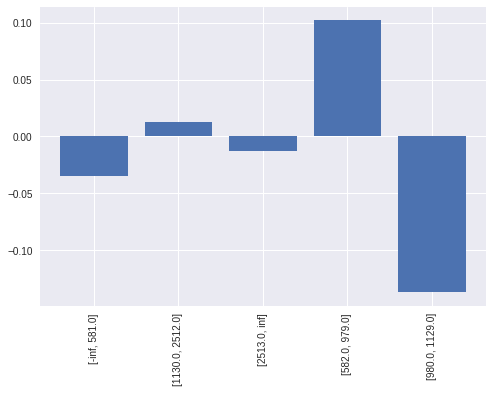

In [ ]:
evalua_categ(X_train1, "v_tree_Total_Revolving_Bal", "W_v_tree_Total_Revolving_Bal")

v_tree_Avg_Utilization_Ratio
   v_tree_Avg_Open_To_Buy  W_v_tree_Avg_Open_To_Buy
18          [-inf, 480.0]                 -0.154907
16         [481.0, 684.0]                  0.838505
4          [684.3, 851.0]                  1.526643
39        [852.0, 1038.0]                  1.118536
10       [1039.0, 1436.0]                  0.474876
14       [1438.0, 1736.0]                 -0.789527
7        [1737.0, 2229.0]                 -0.587656
2        [2230.0, 2949.0]                  0.000693
27       [2952.0, 3664.0]                 -0.351539
20       [3665.0, 4620.0]                 -0.052213
8        [4625.0, 6607.0]                 -0.038751
75       [6612.0, 8363.0]                  0.180411
0       [8365.0, 13184.0]                 -0.137275
9      [13197.0, 23228.0]                  0.394361
12         [23250.0, inf]                 -0.082170


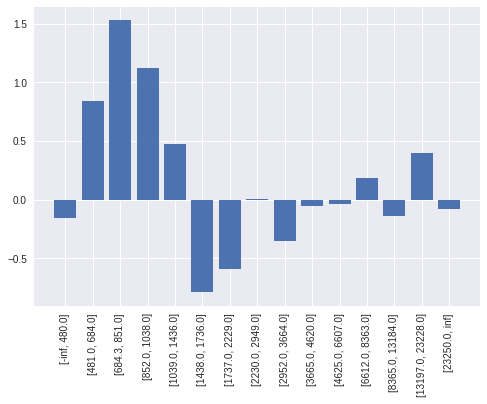

In [ ]:
# Categorías correctas
evalua_categ(X_train1, "v_tree_Avg_Open_To_Buy", "W_v_tree_Avg_Open_To_Buy")

v_tree_Avg_Utilization_Ratio
   v_tree_Total_Amt_Chng_Q4_Q1  W_v_tree_Total_Amt_Chng_Q4_Q1
18               [-inf, 0.467]                      -1.482023
34              [0.468, 0.553]                      -0.512293
1               [0.554, 0.976]                       0.223660
8               [0.977, 1.062]                      -0.804457
0                 [1.063, inf]                       2.325679


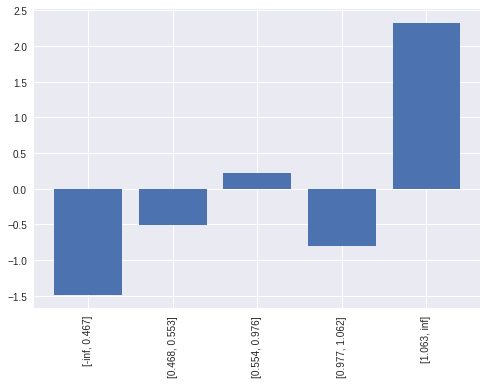

In [ ]:
# Categorías correctas
evalua_categ(X_train1, "v_tree_Total_Amt_Chng_Q4_Q1", "W_v_tree_Total_Amt_Chng_Q4_Q1")

v_tree_Avg_Utilization_Ratio
   v_tree_Total_Trans_Amt  W_v_tree_Total_Trans_Amt
61         [-inf, 1284.0]                 -1.074031
0        [1285.0, 1689.0]                  0.654373
29       [1690.0, 2010.0]                 -0.667253
52       [2011.0, 2263.0]                 -1.619256
1        [2264.0, 2544.0]                 -1.919809
23       [2545.0, 2932.0]                 -1.386366
46       [2933.0, 3474.0]                  1.229078
4        [3475.0, 4505.0]                  4.013182
7        [4506.0, 4723.0]                  2.333873
15       [4724.0, 4909.0]                  1.034567
2        [4911.0, 5364.0]                  1.590522
9       [5366.0, 10583.0]                 -0.833239
27         [11603.0, inf]                       inf


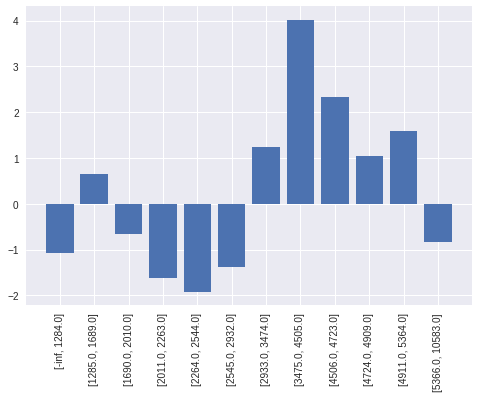

In [ ]:
# Categorías incorrectas
evalua_categ(X_train1, "v_tree_Total_Trans_Amt", "W_v_tree_Total_Trans_Amt")

In [ ]:
new_lista = [[-np.inf,  2010.0]      ,
       [2011.0, 2544.0]       ,
       [2545.0, 4348.0]       ,
       [4349.0, 4505.0]       ,
       [4506.0, 4723.0]       ,
       [4724.0, 4909.0]       ,
       [4911.0, 5364.0]       ,
      [5366.0,  np.inf] ]

In [ ]:
X_train1, aux = corrector_cat(df1, X_train1, new_lista,"c_Total_Trans_Amt", "tgt_Attrition_Flag")

In [ ]:
X_train1=corrector_cat_wgt(X_train1, "v_tree_Total_Trans_Amt", "W_v_tree_Total_Trans_Amt", "c_Total_Trans_Amt_aux", "W_c_Total_Trans_Amt_aux" )

v_tree_Avg_Utilization_Ratio
     v_tree_Total_Trans_Amt  W_v_tree_Total_Trans_Amt
0            [-inf, 2010.0]                 -0.022383
77         [2011.0, 2544.0]                 -0.011772
137        [2545.0, 4348.0]                 -0.029702
1167       [4349.0, 4505.0]                  0.259635
1442       [4506.0, 4723.0]                 -0.056701
2038       [4724.0, 4909.0]                  0.139700
2571       [4911.0, 5364.0]                  0.144945
3346          [5366.0, inf]                 -0.706746


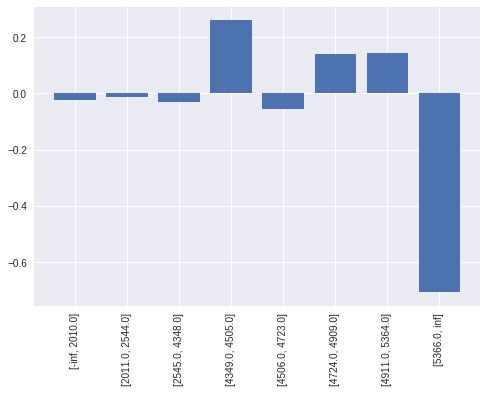

In [ ]:
evalua_categ(X_train1, "v_tree_Total_Trans_Amt", "W_v_tree_Total_Trans_Amt")

v_tree_Avg_Utilization_Ratio
   v_tree_Total_Trans_Ct  W_v_tree_Total_Trans_Ct
18          [-inf, 28.0]                -0.969254
0           [29.0, 37.0]                -0.601601
5           [38.0, 41.0]                -1.539864
24          [42.0, 47.0]                -1.644927
23          [48.0, 54.0]                -1.115246
3           [55.0, 60.0]                 0.034816
7           [61.0, 64.0]                 0.527016
30          [65.0, 67.0]                 1.131677
1           [68.0, 71.0]                 1.203523
15          [72.0, 75.0]                 1.229939
6           [76.0, 78.0]                 1.615257
2           [79.0, 81.0]                 2.159430
9           [82.0, 91.0]                 2.206765
21         [92.0, 104.0]                 4.404329
49          [105.0, inf]                      inf


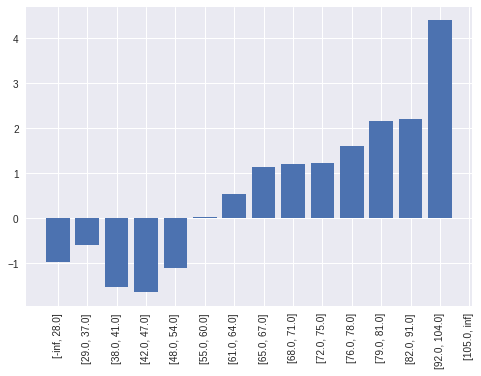

In [ ]:
# Categorías incorrectas
evalua_categ(X_train1, "v_tree_Total_Trans_Ct", "W_v_tree_Total_Trans_Ct")

In [ ]:
new_lista = [[-np.inf, 28.0]  ,
          [29.0, 37.0]        ,
          [38.0, 60.0]        ,
          [61.0, 64.0]        ,
          [65.0, 67.0]        ,
          [68.0,  75.0]       ,
          [76.0, 78.0]        ,
          [79.0, 91.0]        ,
          [92.0, np.inf]]

In [ ]:
X_train1, aux = corrector_cat(df1, X_train1, new_lista,"c_Total_Trans_Ct", "tgt_Attrition_Flag")

In [ ]:
X_train1=corrector_cat_wgt(X_train1, "v_tree_Total_Trans_Ct", "W_v_tree_Total_Trans_Ct", "c_Total_Trans_Ct_aux", "W_c_Total_Trans_Ct_aux" )

v_tree_Avg_Utilization_Ratio
     v_tree_Total_Trans_Ct  W_v_tree_Total_Trans_Ct
2             [-inf, 28.0]                 0.007255
1             [29.0, 37.0]                 0.058690
0             [38.0, 60.0]                -0.091054
506           [61.0, 64.0]                -0.058208
715           [65.0, 67.0]                -0.118478
794           [68.0, 75.0]                 0.030301
627           [76.0, 78.0]                 0.039620
1101          [79.0, 91.0]                 0.138110
2495           [92.0, inf]                 0.050271


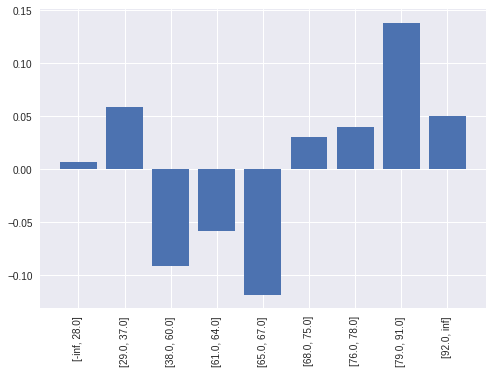

In [ ]:
evalua_categ(X_train1, "v_tree_Total_Trans_Ct", "W_v_tree_Total_Trans_Ct")

v_tree_Avg_Utilization_Ratio
   v_tree_Total_Ct_Chng_Q4_Q1  W_v_tree_Total_Ct_Chng_Q4_Q1
18              [-inf, 0.407]                     -2.076700
1              [0.408, 0.487]                     -1.361242
30             [0.488, 0.536]                     -0.560745
3              [0.537, 0.573]                     -0.184706
4                [0.574, 0.6]                     -0.200871
21             [0.603, 0.629]                      0.412073
7               [0.63, 0.656]                      0.312357
14             [0.657, 0.681]                      1.044745
0                [0.682, inf]                      0.836592


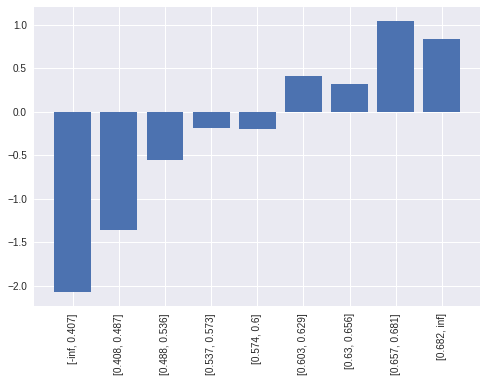

In [ ]:
evalua_categ(X_train1, "v_tree_Total_Ct_Chng_Q4_Q1", "W_v_tree_Total_Ct_Chng_Q4_Q1")

v_tree_Avg_Utilization_Ratio
   v_tree_Avg_Utilization_Ratio  W_v_tree_Avg_Utilization_Ratio
1                  [-inf, 0.02]                       -1.120137
0                 [0.021, 0.45]                        0.623808
3                [0.451, 0.792]                        1.017590
18                 [0.793, inf]                       -0.189878


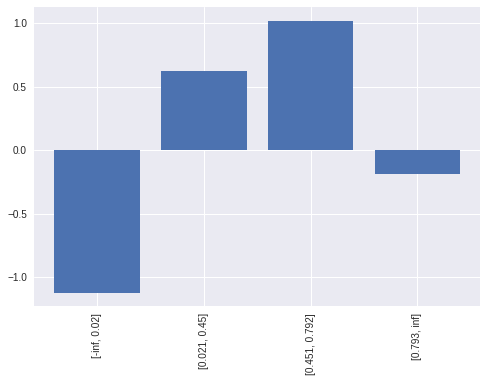

In [ ]:
evalua_categ(X_train1, "v_tree_Avg_Utilization_Ratio", "W_v_tree_Avg_Utilization_Ratio")

In [ ]:
cols= ['v_Gender',
 'v_Dependent_count',
 'v_Education_Level',
 'v_Marital_Status',
 'v_Income_Category',
 'v_Card_Category',
 'v_Total_Relationship_Count',
 'v_Months_Inactive_12_mon',
 'v_Contacts_Count_12_mon' ]

v_Gender
  v_Gender  W_v_Gender
2        f   -0.099568
0        m    0.118943


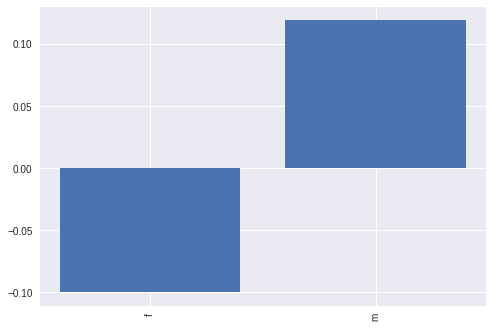

v_Dependent_count
   v_Dependent_count  W_v_Dependent_count
1                  0             0.085797
15                 1             0.118116
0                  2             0.024244
5                  3            -0.130058
2                  4            -0.018192
40                 5             0.136648


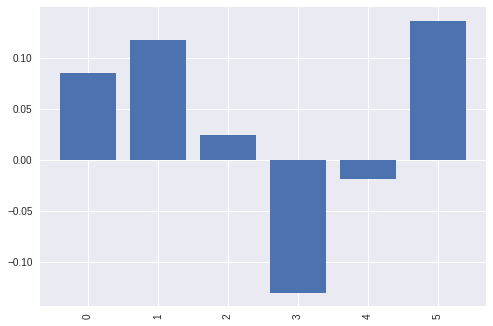

v_Education_Level
   v_Education_Level  W_v_Education_Level
0           graduate             0.052607
4        high school             0.044384
20     post graduate            -0.190201
2         uneducated             0.024977
3            unknown            -0.088271


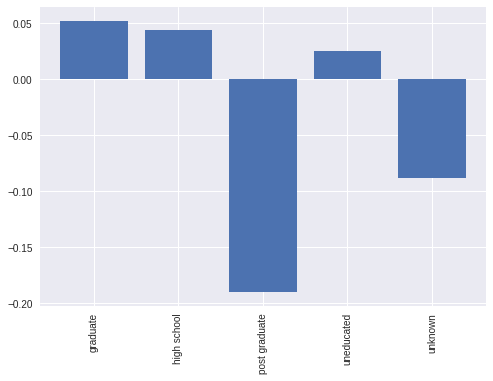

v_Marital_Status
   v_Marital_Status  W_v_Marital_Status
5          divorced           -0.024914
0           married            0.082083
1            single           -0.065768
12          unknown           -0.120564


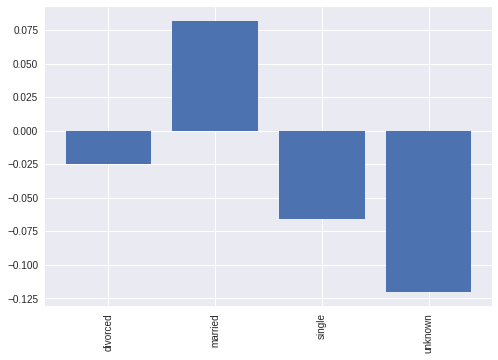

v_Income_Category
  v_Income_Category  W_v_Income_Category
4           40k 60k             0.099302
8           60k 80k             0.239553
6          80k 120k             0.012889
3     less than 40k            -0.088934
0    more than 120k            -0.128950
1           unknown            -0.076431


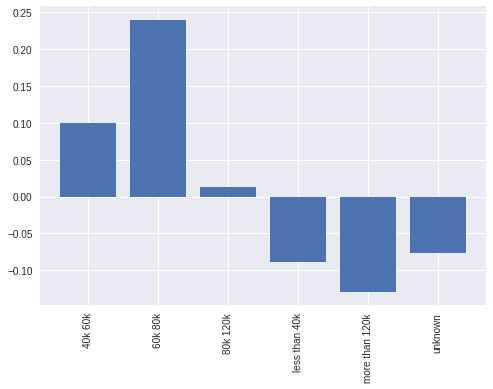

v_Card_Category
    v_Card_Category  W_v_Card_Category
0              blue          -0.002095
12             gold           0.207523
576        platinum          -0.385541
17           silver           0.015218


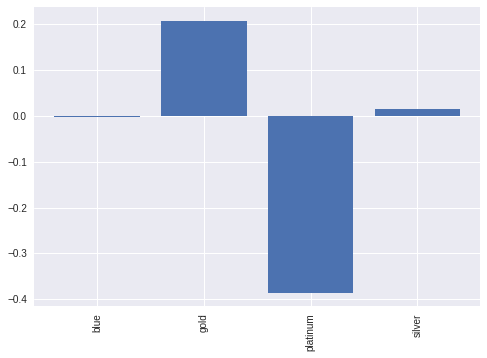

v_Total_Relationship_Count
   v_Total_Relationship_Count  W_v_Total_Relationship_Count
20                          1                     -0.600533
2                           2                     -0.731992
0                           3                     -0.067737
5                           4                      0.359792
4                           5                      0.332549
1                           6                      0.499169


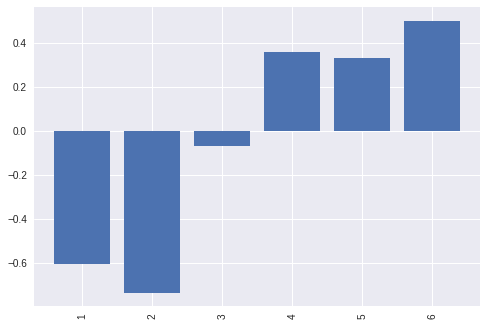

v_Months_Inactive_12_mon
    v_Months_Inactive_12_mon  W_v_Months_Inactive_12_mon
513                        0                   -1.718347
3                          1                    1.381540
0                          2                    0.037825
1                          3                   -0.337109
23                         4                   -0.818863
8                          5                   -0.234310
11                         6                   -0.062768


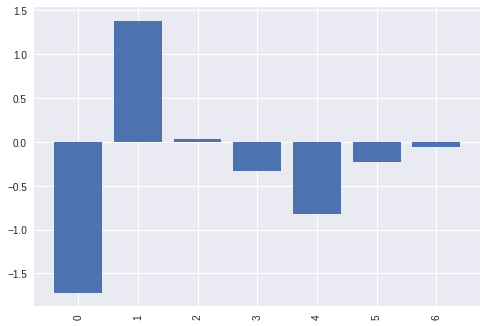

v_Contacts_Count_12_mon
    v_Contacts_Count_12_mon  W_v_Contacts_Count_12_mon
0                         0                   2.335128
3                         1                   0.879392
2                         2                   0.274701
1                         3                  -0.260845
8                         4                  -0.436633
75                        5                  -0.824793
314                       6                        NaN


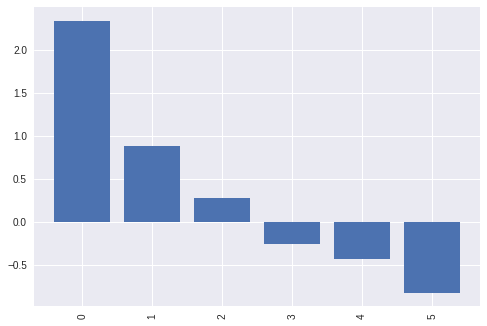

In [ ]:
for col in cols:
  evalua_categ(X_train1, col, f"W_{col}")

En general las variables categóricas tienen etiquetas adecuadas pues sus pesos son suficientemente diferentes, a excepción de la variable v_Total_Relationship_Count y v_Contacts_Count_12_mon cuyos pesos de algunas categorías son muy pequelos y conviene reetiquetar.

In [ ]:
# Primera variable
X_train1["v_Total_Relationship_Count"] = X_train1["v_Total_Relationship_Count"].map({1:1,2:1,3:3, 4:4, 5:4, 6:6})
X_test1["v_Total_Relationship_Count"] = X_test1["v_Total_Relationship_Count"].map({1:1,2:1,3:3, 4:4, 5:4, 6:6})

In [ ]:
aux, iv = WoE_IV(X_train1, "v_Total_Relationship_Count", "tgt_Attrition_Flag")

In [ ]:
X_train1.drop(columns= "W_v_Total_Relationship_Count", inplace = True)

In [ ]:
X_test1.drop(columns= "W_v_Total_Relationship_Count", inplace = True)

In [ ]:
X_train1= X_train1.merge(aux, on = "v_Total_Relationship_Count", how= "left")

In [ ]:
X_test1= X_test1.merge(aux, on = "v_Total_Relationship_Count", how= "left")

v_Contacts_Count_12_mon
  v_Total_Relationship_Count  W_v_Total_Relationship_Count
2                          1                     -0.676645
0                          3                     -0.067737
4                          4                      0.346375
1                          6                      0.499169


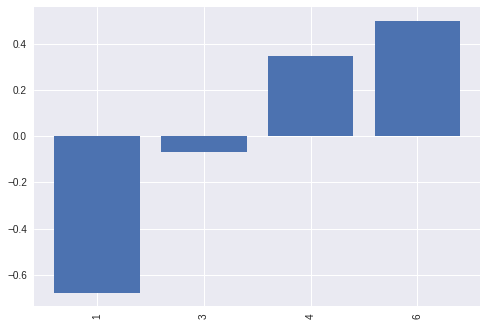

In [ ]:
# Verificamos que los pesos sean diferentes
evalua_categ(X_train1, "v_Total_Relationship_Count", "W_v_Total_Relationship_Count")

In [ ]:
# Siguiente variable
X_train1["v_Contacts_Count_12_mon"] = X_train1["v_Contacts_Count_12_mon"].map({0:0, 1:1,2:2,3:3, 4:4, 5:5, 6:5})
X_test1["v_Contacts_Count_12_mon"] = X_test1["v_Contacts_Count_12_mon"].map({0:0, 1:1,2:2,3:3, 4:4, 5:5, 6:5})

In [ ]:
aux, iv = WoE_IV(X_train1, "v_Contacts_Count_12_mon", "tgt_Attrition_Flag")

In [ ]:
X_train1.drop(columns= "W_v_Contacts_Count_12_mon", inplace = True)

In [ ]:
X_test1.drop(columns= "W_v_Contacts_Count_12_mon", inplace = True)

In [ ]:
X_train1= X_train1.merge(aux, on = "v_Contacts_Count_12_mon", how= "left")

In [ ]:
X_test1= X_test1.merge(aux, on = "v_Contacts_Count_12_mon", how= "left")

v_Contacts_Count_12_mon
   v_Contacts_Count_12_mon  W_v_Contacts_Count_12_mon
0                        0                   2.335128
3                        1                   0.879392
2                        2                   0.274701
1                        3                  -0.260845
8                        4                  -0.436633
75                       5                  -1.563403


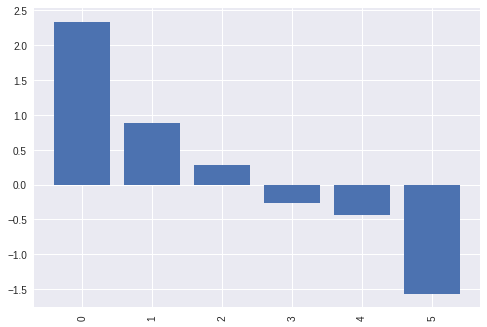

In [ ]:
# Verificamos que los pesos sean diferentes
evalua_categ(X_train1, "v_Contacts_Count_12_mon", "W_v_Contacts_Count_12_mon")

Después de este proceso, verificamos que los pesos de todas las categorías de todas las variables son diferentes.

## P-value y tamaño del efecto

In [ ]:
cols.extend(['v_tree_Customer_Age',
 'v_tree_Months_on_book',
 'v_tree_Credit_Limit',
 'v_tree_Total_Revolving_Bal',
 'v_tree_Avg_Open_To_Buy',
 'v_tree_Total_Amt_Chng_Q4_Q1',
 'v_tree_Total_Trans_Amt',
 'v_tree_Total_Trans_Ct',
 'v_tree_Total_Ct_Chng_Q4_Q1',
 'v_tree_Avg_Utilization_Ratio'])

In [ ]:
#Volvemos a evaluar el valor de la información con las nuevas categorías
data_iv, X_train1, X_test1=evaluacion(X_train1, X_test1, cols,"tgt_Attrition_Flag", 0)

In [ ]:
efecto=pd.DataFrame()
for col in cols:
    aux=tamaño_efecto(X_train1,col,"tgt_Attrition_Flag")
    efecto=pd.concat([efecto,aux])
efecto.reset_index(drop=True,inplace=True)

In [ ]:
importancia=efecto.merge(data_iv,on="predictor")

In [ ]:
importancia

,predictor,p_value,tamaño_efecto,efe_interpre,iv,iv_status
0,v_Gender,3.541187e-04,0.039688,insuficiente,0.011831,insuficiente
1,v_Dependent_count,8.109496e-02,0.034782,insuficiente,0.008817,insuficiente
2,v_Education_Level,1.125707e-01,0.030388,insuficiente,0.006526,insuficiente
3,v_Marital_Status,8.930232e-02,0.028346,insuficiente,0.005898,insuficiente
4,v_Income_Category,1.107147e-02,0.042799,insuficiente,0.013935,insuficiente
5,v_Card_Category,8.171086e-01,0.010740,insuficiente,0.000827,insuficiente
6,v_Total_Relationship_Count,1.302966e-51,0.171896,bajo,0.199414,medio
7,v_Months_Inactive_12_mon,4.662617e-65,0.197233,bajo,0.362726,alto
8,v_Contacts_Count_12_mon,4.951886e-73,0.207233,bajo,0.345163,alto
9,v_tree_Customer_Age,1.331374e-03,0.053991,insuficiente,0.021032,bajo


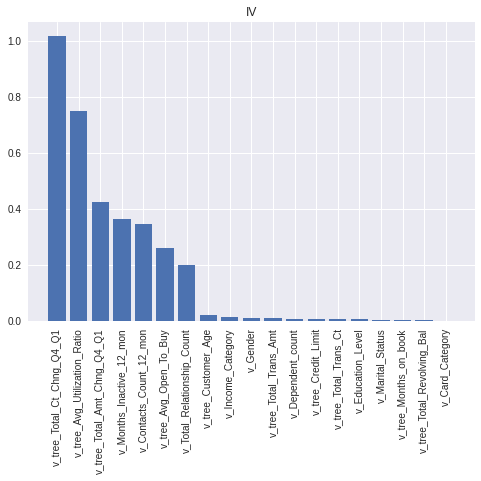

In [ ]:
# Graficamos el IV
aux=importancia.sort_values(by="iv",ascending=False)
plt.bar(aux["predictor"],aux["iv"])
plt.xticks(rotation=90)
plt.title("IV")
plt.show()

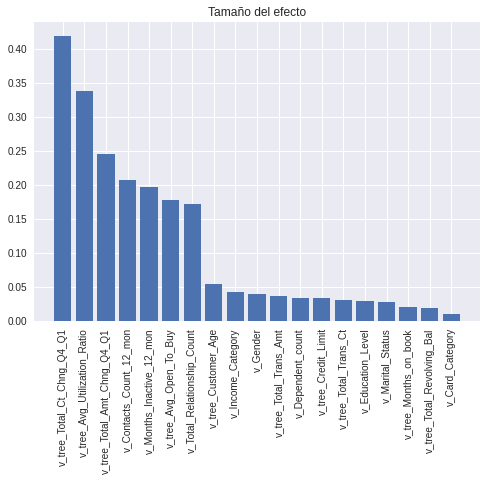

In [ ]:
# Graficamos el tamño del efecto
aux=importancia.sort_values(by="tamaño_efecto",ascending=False)
plt.bar(aux["predictor"],aux["tamaño_efecto"])
plt.xticks(rotation=90)
plt.title("Tamaño del efecto")
plt.show()

Observamos la correlación que hay entre el tamaño del efecto y el valor de la información pues si uno lo clasifica de una manera, es muy probable que el otro método lo identifique de igual forma.

Dada la baja relación que tienen algunas variables con el objetivo las vamos a omitir. Se considerarán para ello aquellas que estén etiquetadas como "insuficiente" por ambos métodos.

In [ ]:
importancia[(importancia["efe_interpre"]=="insuficiente") & (importancia["iv_status"]=="insuficiente")]

,predictor,p_value,tamaño_efecto,efe_interpre,iv,iv_status
0,v_Gender,0.000354,0.039688,insuficiente,0.011831,insuficiente
1,v_Dependent_count,0.081095,0.034782,insuficiente,0.008817,insuficiente
2,v_Education_Level,0.112571,0.030388,insuficiente,0.006526,insuficiente
3,v_Marital_Status,0.089302,0.028346,insuficiente,0.005898,insuficiente
4,v_Income_Category,0.011071,0.042799,insuficiente,0.013935,insuficiente
5,v_Card_Category,0.817109,0.010740,insuficiente,0.000827,insuficiente
10,v_tree_Months_on_book,0.639286,0.020472,insuficiente,0.003071,insuficiente
11,v_tree_Credit_Limit,0.574532,0.034270,insuficiente,0.008399,insuficiente
12,v_tree_Total_Revolving_Bal,0.558694,0.019227,insuficiente,0.002700,insuficiente
15,v_tree_Total_Trans_Amt,0.124728,0.037403,insuficiente,0.009791,insuficiente


In [ ]:
# Sólo nos quedamos con las variables que tienen los pesos
X_train1=X_train1[list(X_train1.filter(like="W_").columns)+["tgt_Attrition_Flag"]]
X_test1=X_test1[list(X_test1.filter(like="W_").columns)+["tgt_Attrition_Flag"]]

In [ ]:
X_test1.shape

(2026, 20)

In [ ]:
# Selecciono las variables que hay que remover por insuficiencia en el valor de la información y el tamaño del efecto
list_to_drop = ["W_v_Gender", "W_v_Dependent_count", "W_v_Education_Level", "W_v_Marital_Status", "W_v_Income_Category",
                "W_v_Card_Category", "W_v_tree_Customer_Age", "W_v_tree_Months_on_book", "W_v_tree_Total_Revolving_Bal",
                "W_v_tree_Total_Trans_Amt", "W_v_tree_Total_Trans_Ct"]

In [ ]:
X_train1.drop(columns= list_to_drop,inplace=True)
X_test1.drop(columns= list_to_drop,inplace=True)

## Datos finales

In [ ]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   W_v_Months_Inactive_12_mon      8101 non-null   float64
 1   W_v_tree_Credit_Limit           8101 non-null   float64
 2   W_v_tree_Avg_Open_To_Buy        8101 non-null   float64
 3   W_v_tree_Total_Amt_Chng_Q4_Q1   8101 non-null   float64
 4   W_v_tree_Total_Ct_Chng_Q4_Q1    8101 non-null   float64
 5   W_v_tree_Avg_Utilization_Ratio  8101 non-null   float64
 6   W_v_Total_Relationship_Count    8101 non-null   float64
 7   W_v_Contacts_Count_12_mon       8101 non-null   float64
 8   tgt_Attrition_Flag              8101 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 632.9 KB


In [ ]:
y_train1 = X_train1["tgt_Attrition_Flag"]

In [ ]:
lista = [x for x in list(X_train1.columns) if x not in ["tgt_Attrition_Flag"]]
X_train1 = X_train1[lista]

In [ ]:
X_train1.head(5)

,W_v_Months_Inactive_12_mon,W_v_tree_Credit_Limit,W_v_tree_Avg_Open_To_Buy,W_v_tree_Total_Amt_Chng_Q4_Q1,W_v_tree_Total_Ct_Chng_Q4_Q1,W_v_tree_Avg_Utilization_Ratio,W_v_Total_Relationship_Count,W_v_Contacts_Count_12_mon
0,0.037825,0.004931,-0.137275,2.325679,0.836592,0.623808,-0.067737,2.335128
1,-0.337109,0.004931,-0.137275,0.223660,-1.361242,-1.120137,0.499169,-0.260845
2,-0.337109,-0.120082,0.000693,0.223660,0.836592,0.623808,-0.676645,0.274701
3,1.381540,-0.003993,0.000693,0.223660,-0.184706,1.017590,-0.067737,0.879392
4,0.037825,-0.181446,1.526643,0.223660,-0.200871,1.017590,0.346375,0.879392


In [ ]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2025
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   W_v_Months_Inactive_12_mon      2026 non-null   float64
 1   W_v_tree_Credit_Limit           2026 non-null   float64
 2   W_v_tree_Avg_Open_To_Buy        2026 non-null   float64
 3   W_v_tree_Total_Amt_Chng_Q4_Q1   2026 non-null   float64
 4   W_v_tree_Total_Ct_Chng_Q4_Q1    2026 non-null   float64
 5   W_v_tree_Avg_Utilization_Ratio  2026 non-null   float64
 6   W_v_Total_Relationship_Count    2026 non-null   float64
 7   W_v_Contacts_Count_12_mon       2026 non-null   float64
 8   tgt_Attrition_Flag              2026 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 158.3 KB


In [ ]:
y_test1 = X_test1["tgt_Attrition_Flag"]

In [ ]:
lista = [x for x in list(X_test1.columns) if x not in ["tgt_Attrition_Flag"]]
X_test1= X_test1[lista]

In [ ]:
X_test1.head(5)

,W_v_Months_Inactive_12_mon,W_v_tree_Credit_Limit,W_v_tree_Avg_Open_To_Buy,W_v_tree_Total_Amt_Chng_Q4_Q1,W_v_tree_Total_Ct_Chng_Q4_Q1,W_v_tree_Avg_Utilization_Ratio,W_v_Total_Relationship_Count,W_v_Contacts_Count_12_mon
0,0.037825,0.507627,0.394361,0.223660,0.836592,0.623808,0.346375,2.335128
1,-0.337109,0.133819,-0.082170,-0.804457,-0.184706,-1.120137,-0.676645,-0.260845
2,1.381540,0.257815,1.526643,0.223660,-0.560745,1.017590,-0.067737,0.274701
3,0.037825,-0.120587,0.000693,-0.804457,0.836592,0.623808,0.499169,-0.260845
4,-0.818863,0.257815,1.118536,0.223660,0.836592,1.017590,-0.676645,-0.260845


# Modelos supervisados

## Regresión logística

**Enfoque 1**

In [ ]:
logistic1=LogisticRegression(solver='liblinear')

In [ ]:
logistic1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
metricas_logistica(logistic1,X_test,y_test)

 Roc Validate: 0.88742
 Acc Validate: 0.89055
 F1 score: 0.93889
 Media del error (pred-X_test): 0.10945
 Matrix Conf Validate:  
 [[  90  162]
 [  36 1521]]


In [ ]:
# Aplicamos regresión (penalización) lasso
logistic=LogisticRegression(solver='liblinear',penalty='l1')

In [ ]:
logistic.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
metricas_logistica(logistic,X_test,y_test)

 Roc Validate: 0.88957
 Acc Validate: 0.87617
 F1 score: 0.92694
 Media del error (pred-X_test): 0.12383
 Matrix Conf Validate:  
 [[ 164   88]
 [ 136 1421]]


**Enfoque 1: Reembalance**

In [ ]:
# Sin castigo
logistic1.fit(X_train_r, y_train_r)

LogisticRegression(solver='liblinear')

In [ ]:
metricas_logistica(logistic1,X_test_r,y_test_r)

 Roc Validate: 0.91410
 Acc Validate: 0.82274
 F1 score: 0.82921
 Media del error (pred-X_test): 0.17726
 Matrix Conf Validate:  
 [[1222  335]
 [ 217 1340]]


In [ ]:
# Con castigo
logistic.fit(X_train_r, y_train_r)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
metricas_logistica(logistic,X_test_r,y_test_r)

 Roc Validate: 0.91561
 Acc Validate: 0.83622
 F1 score: 0.82093
 Media del error (pred-X_test): 0.16378
 Matrix Conf Validate:  
 [[1435  122]
 [ 388 1169]]


**Enfoque 2**

In [ ]:
logistic1.fit(X_train1,y_train1)

LogisticRegression(solver='liblinear')

In [ ]:
metricas_logistica(logistic1,X_test1,y_test1)

 Roc Validate: 0.87326
 Acc Validate: 0.88648
 F1 score: 0.93470
 Media del error (pred-X_test): 0.11352
 Matrix Conf Validate:  
 [[ 150  159]
 [  71 1646]]


In [ ]:
# Regresión con castigo
logistic.fit(X_train1,y_train1)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
metricas_logistica(logistic,X_test1,y_test1)

 Roc Validate: 0.87327
 Acc Validate: 0.88648
 F1 score: 0.93470
 Media del error (pred-X_test): 0.11352
 Matrix Conf Validate:  
 [[ 150  159]
 [  71 1646]]


In [ ]:
logistic.predict(X_test1)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
logistic.coef_

array([[1.04161727, 1.05388555, 0.3377509 , 0.66158052, 0.98849016,
        0.98890363, 1.41185203, 1.03906978]])

## K- vecinos
**Enfoque 1**

In [ ]:
#Hacemos otro escalamiento para facilitar el proceso de modelado
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

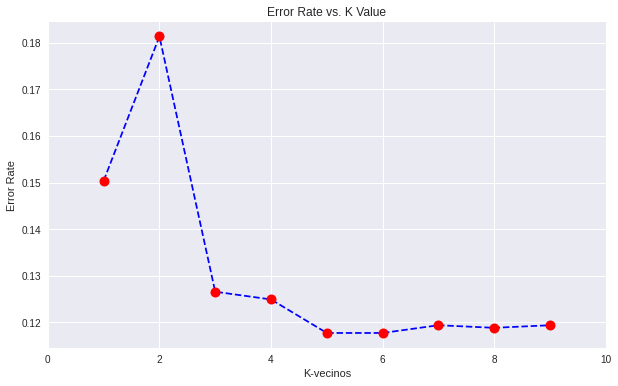

In [ ]:
plot_vecinos(X_train2, y_train, X_test2, y_test, max_vecinos=10)

In [ ]:
model2 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
model2.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
metricas_logistica(model2,X_test2, y_test)

 Roc Validate: 0.82595
 Acc Validate: 0.88115
 F1 score: 0.93411
 Media del error (pred-X_test): 0.11885
 Matrix Conf Validate:  
 [[  70  182]
 [  33 1524]]


In [ ]:
metricas_testVStrain(8, model2, X_train2, X_test2, y_test, y_train)

 K= 8
Train
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1104
           1       0.93      0.98      0.95      6189

    accuracy                           0.92      7293
   macro avg       0.88      0.79      0.83      7293
weighted avg       0.92      0.92      0.92      7293



Test
              precision    recall  f1-score   support

           0       0.68      0.28      0.39       252
           1       0.89      0.98      0.93      1557

    accuracy                           0.88      1809
   macro avg       0.79      0.63      0.66      1809
weighted avg       0.86      0.88      0.86      1809



**Enfoque 2**

In [ ]:
X_train3 = sc.fit_transform(X_train1)
X_test3 = sc.transform(X_test1)

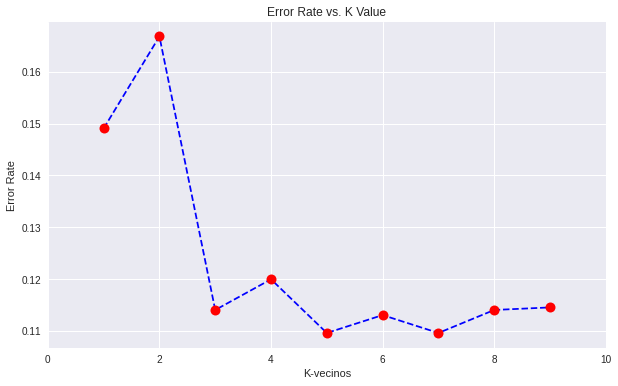

In [ ]:
plot_vecinos(X_train3, y_train1, X_test3, y_test1, max_vecinos=10)

In [ ]:
model2_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model2_2.fit(X_train3, y_train1)

KNeighborsClassifier()

In [ ]:
metricas_logistica(model2_2,X_train3, y_train1)

 Roc Validate: 0.94772
 Acc Validate: 0.90890
 F1 score: 0.94729
 Media del error (pred-X_test): 0.09110
 Matrix Conf Validate:  
 [[ 732  586]
 [ 152 6631]]


In [ ]:
metricas_logistica(model2_2,X_test3, y_test1)

 Roc Validate: 0.81154
 Acc Validate: 0.89042
 F1 score: 0.93715
 Media del error (pred-X_test): 0.10958
 Matrix Conf Validate:  
 [[ 149  160]
 [  62 1655]]


In [ ]:
metricas_testVStrain(5, model2_2, X_train3, X_test3, y_test1, y_train1)

 K= 5
Train
              precision    recall  f1-score   support

           0       0.83      0.56      0.66      1318
           1       0.92      0.98      0.95      6783

    accuracy                           0.91      8101
   macro avg       0.87      0.77      0.81      8101
weighted avg       0.90      0.91      0.90      8101



Test
              precision    recall  f1-score   support

           0       0.71      0.48      0.57       309
           1       0.91      0.96      0.94      1717

    accuracy                           0.89      2026
   macro avg       0.81      0.72      0.76      2026
weighted avg       0.88      0.89      0.88      2026



## Ensambles

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
?XGBClassifier

In [ ]:
xgb=XGBClassifier(learning_rate=0.1, n_estimators=190, max_depth=5,  seed=23333)

 **Enfoque 1**

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=190, seed=23333)

In [ ]:
metricas_logistica(xgb,X_test,y_test)

 Roc Validate: 0.95068
 Acc Validate: 0.93201
 F1 score: 0.96061
 Media del error (pred-X_test): 0.06799
 Matrix Conf Validate:  
 [[ 186   66]
 [  57 1500]]


In [ ]:
metricas_logistica(xgb,X_train,y_train)

 Roc Validate: 0.99364
 Acc Validate: 0.96846
 F1 score: 0.98156
 Media del error (pred-X_test): 0.03154
 Matrix Conf Validate:  
 [[ 941  163]
 [  67 6122]]


In [ ]:
xgb.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1])

**Enfoque 2**

In [ ]:
xgb.fit(X_train1, y_train1)

XGBClassifier(max_depth=5, n_estimators=190, seed=23333)

In [ ]:
metricas_logistica(xgb,X_test1,y_test1)

 Roc Validate: 0.87122
 Acc Validate: 0.89339
 F1 score: 0.93846
 Media del error (pred-X_test): 0.10661
 Matrix Conf Validate:  
 [[ 163  146]
 [  70 1647]]


In [ ]:
metricas_logistica(xgb,X_train1,y_train1)

 Roc Validate: 0.94510
 Acc Validate: 0.92495
 F1 score: 0.95639
 Media del error (pred-X_test): 0.07505
 Matrix Conf Validate:  
 [[ 826  492]
 [ 116 6667]]


In [ ]:
knn=KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
regression=LogisticRegression(solver='liblinear',penalty='l1')
xgboost = XGBClassifier(learning_rate=0.1, n_estimators=190, max_depth=5, subsample=0.9, colsample_bytree=0.8, seed=23333)

In [ ]:
voting= VotingClassifier(estimators=[ ("k-vecinos", knn),("regression",regression), ("xgb",xgboost)])

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('k-vecinos', KNeighborsClassifier(n_neighbors=8)),
                             ('regression',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('xgb',
                              XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                            n_estimators=190, seed=23333,
                                            subsample=0.9))])

In [ ]:
classification_metrics(X=X_train, y=y_train, estimator=voting)

Accuracy media: 0.91, desviación estándar: 0.003562694083262949


In [ ]:
classification_metrics(X=X_test, y=y_test, estimator=voting)

Accuracy media: 0.91, desviación estándar: 0.007450825738477503


In [ ]:
voting.estimators_

[KNeighborsClassifier(n_neighbors=8),
 LogisticRegression(penalty='l1', solver='liblinear'),
 XGBClassifier(colsample_bytree=0.8, max_depth=5, n_estimators=190, seed=23333,
               subsample=0.9)]

# Modelo no supervisado

Dado que esta clase de modelos no requier de un conjunto de entrenamiento y uno de prueba, realizaré ingeniería de variables al conjunto completo a partir del data con normalización de variables.

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_Client_Num               10127 non-null  int64  
 1   v_Attrition_Flag            10127 non-null  object 
 2   c_Customer_Age              10127 non-null  float64
 3   v_Gender                    10127 non-null  object 
 4   v_Dependent_count           10127 non-null  int64  
 5   v_Education_Level           10127 non-null  object 
 6   v_Marital_Status            10127 non-null  object 
 7   v_Income_Category           10127 non-null  object 
 8   v_Card_Category             10127 non-null  object 
 9   c_Months_on_book            10127 non-null  float64
 10  v_Total_Relationship_Count  10127 non-null  int64  
 11  v_Months_Inactive_12_mon    10127 non-null  int64  
 12  v_Contacts_Count_12_mon     10127 non-null  int64  
 13  c_Credit_Limit              101

In [ ]:
cols= list(df_model.filter(like="c_").columns)

In [ ]:
results, limInf_iqr, limSup_iqr,limInf_perc, limSup_perc= OUTLIERS(df_model, cols)

In [ ]:
# QUITRAMOS OUTLIERS?
#results

## Ingenieria de variables

In [ ]:
#One-hot encoding
df_model["v_Attrition_Flag"] = df_model["v_Attrition_Flag"].map(lambda x: 1 if x=="existing customer" else 0)

In [ ]:
df_model["v_Gender"] = df_model["v_Gender"].map(lambda x: 1 if x=="f" else 0)

In [ ]:
# Codificación ordinal
diccionario = {"unknown": 0,"less than 40k":1, "40k 60k":2, "60k 80k":3, "80k 120k":4, "more than 120k":5}
df_model["v_Income_Category"] = df_model["v_Income_Category"].map(diccionario)

In [ ]:
# Count encoding
df_model["v_Education_Level"] = df_model["v_Education_Level"].map(df_model["v_Education_Level"].value_counts(1).to_dict())

#{'graduate': 0.4089068825910931, 'high school': 0.1987755505085415,
 #'post graduate': 0.09548731114841513,'uneducated': 0.14683519304828677,'unknown': 0.14999506270366347}

In [ ]:
df_model["v_Marital_Status"] = df_model["v_Marital_Status"].map(df_model["v_Marital_Status"].value_counts(1).to_dict())
# {'divorced': 0.07386195319443073, 'married': 0.4628221585859583,
#'single': 0.3893551890984497, 'unknown': 0.07396069912116125}

In [ ]:
df_model["v_Card_Category"] = df_model["v_Card_Category"].map(df_model["v_Card_Category"].value_counts(1).to_dict())
#{'blue': 0.931766564629209, 'gold': 0.011454527500740594,
# 'platinum': 0.0019749185346104475,'silver': 0.054803989335439916}

In [ ]:
df_model.head(5)

,id_Client_Num,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio
0,768805383,1,45.0,0,3,0.198776,0.462822,3,0.931767,39.0,5,1,3,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,818770008,1,49.0,1,5,0.408907,0.389355,1,0.931767,44.0,6,1,2,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,713982108,1,51.0,0,3,0.408907,0.462822,4,0.931767,36.0,4,1,0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,769911858,1,40.0,1,4,0.198776,0.073961,1,0.931767,34.0,3,4,1,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,709106358,1,40.0,0,3,0.146835,0.462822,3,0.931767,21.0,5,1,0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


In [ ]:
df_model.shape

(10127, 21)

## Gaussian Mixture

In [ ]:
# Seleccionamos las variables que no son dicotómicas "v_Attrition_Flag", "v_Gender"
columns_drop=["id_Client_Num"]
#[[x for x in df_model.columns if x not in columns_drop]]
df1=df_model[[x for x in df_model.columns if x not in columns_drop]]

In [ ]:
df_complete=df_model.copy()

In [ ]:
#df1=df_model.copy()

### Visualización

In [ ]:
sc = MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(index = df1.index, data = sc.fit_transform(df1), columns=df1.columns)

In [ ]:
pca = PCA(n_components=0.9)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs),index = Xs.index, columns=[f"p{x+1}" for x in range(pca.n_components_)])

### Modelo II

In [ ]:
# Seleccionamos las variables que no son dicotómicas "v_Attrition_Flag", "v_Gender"
columns_drop=["id_Client_Num"]
#[[x for x in df_model.columns if x not in columns_drop]]
df1=df_model[[x for x in df_model.columns if x not in columns_drop]]

In [ ]:
df_complete=df_model.copy()

In [ ]:
sc = MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(index = df1.index, data = sc.fit_transform(df1), columns=df1.columns)

### Multicolinealidad

In [ ]:
vc = VarClusHi(df=Xs, feat_list=Xs.columns)

In [ ]:
vc.varclus()

In [ ]:
 vc.rsquare.sort_values(by=["Cluster", "RS_Ratio"]).groupby(["Cluster"]).head(20)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
2,0,c_Avg_Open_To_Buy,0.928882,0.222085,0.091421
1,0,c_Credit_Limit,0.903853,0.225067,0.124071
0,0,v_Card_Category,0.437991,0.030775,0.579854
3,0,c_Avg_Utilization_Ratio,0.432473,0.154906,0.671555
5,1,c_Total_Trans_Amt,0.870199,0.035171,0.134533
6,1,c_Total_Trans_Ct,0.810851,0.089367,0.207712
4,1,v_Total_Relationship_Count,0.303036,0.007856,0.702483
7,2,c_Customer_Age,0.876314,0.002426,0.123987
8,2,c_Months_on_book,0.868638,0.001459,0.131554
9,2,v_Dependent_count,0.066853,0.004118,0.937006


In [ ]:
res = vc.rsquare.sort_values(by=["Cluster", "RS_Ratio"]).groupby(["Cluster"]).first()

In [ ]:
res

,Variable,RS_Own,RS_NC,RS_Ratio
Cluster,,,,
0,c_Avg_Open_To_Buy,0.928882,0.222085,0.091421
1,c_Total_Trans_Amt,0.870199,0.035171,0.134533
2,c_Customer_Age,0.876314,0.002426,0.123987
3,v_Attrition_Flag,0.625382,0.064059,0.400258
4,v_Gender,0.893304,0.144905,0.124777
5,c_Total_Amt_Chng_Q4_Q1,0.692095,0.013582,0.312145
6,v_Education_Level,1.000000,0.000066,0.000000


In [ ]:
bf = [x for x in res["Variable"]]

In [ ]:
Xv = Xs[bf]

In [ ]:
Xv=Xs[bf]

In [ ]:
pca = PCA(n_components=0.9)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs),index = Xs.index, columns=[f"p{x+1}" for x in range(pca.n_components_)])

In [ ]:
df_cl = pd.DataFrame()
for k in range(2, 10):
    cluster = GaussianMixture(n_components=k, random_state=10).fit(Xv)
    clusters = cluster.predict(Xv)
    df_cl.loc[k, "db"] = davies_bouldin_score(Xv,clusters)
    df_cl.loc[k, "slc"] = silhouette_score(Xv,clusters)

In [ ]:
configure_plotly_browser_state()
df_cl[["db"]].iplot(mode="markers+lines")

In [ ]:
configure_plotly_browser_state()
df_cl[["slc"]].iplot(mode="markers+lines")

In [ ]:
cluster = GaussianMixture(n_components=6, random_state=10)

In [ ]:
cluster.fit(Xv)

GaussianMixture(n_components=6, random_state=10)

In [ ]:
Xv["cl"] =df1["cl"] = Xs["cl"] = Xp["cl"] = cluster.predict(Xv).astype(str)

In [ ]:
configure_plotly_browser_state()
Xp.reset_index().iplot(kind="scatter", x="p1", y="p2", categories="cl", mode="markers")

In [ ]:
#configure_plotly_browser_state()
#Xp.reset_index().iplot(kind="scatter3d", x="p1", y="p2", z="p3", categories="cl", mode="markers")

### Perfilamiento

In [ ]:
df1.groupby("cl").mean().style.background_gradient(cmap='Blues')

,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio
cl,,,,,,,,,,,,,,,,,,,,
0,1.000000,46.125312,0.000000,2.323064,0.158162,0.376619,3.308493,0.857253,35.841799,3.960033,2.243131,2.417569,12616.724729,1297.546628,11319.178102,0.776596,4645.859700,65.945462,0.731827,0.215933
1,1.000000,46.443418,1.000000,2.336798,0.156610,0.378353,0.983834,0.888549,35.939954,3.900693,2.279061,2.304080,5179.705697,1232.394534,3947.311162,0.767977,4698.447267,71.217090,0.752605,0.371339
2,1.000000,46.391257,1.000000,2.329508,0.408907,0.375651,1.006557,0.888277,35.946995,3.884153,2.283607,2.303825,5060.941585,1249.134426,3811.807158,0.771032,4575.868852,70.779235,0.748323,0.369998
3,1.000000,46.035329,0.000000,2.357485,0.408907,0.379265,3.268263,0.844740,35.771257,3.904192,2.298802,2.407186,12667.477605,1243.563473,11423.914132,0.775303,4685.517365,66.328144,0.735415,0.214966
4,0.000000,46.707317,0.000000,2.441894,0.252621,0.369520,3.450502,0.845325,36.213773,3.120516,2.698709,3.021521,12966.891679,680.315638,12286.576040,0.708199,3509.779053,46.110473,0.579077,0.106139
5,0.000000,46.623656,1.000000,2.373118,0.255820,0.375433,0.982796,0.893448,36.151613,3.398925,2.689247,2.935484,4515.497527,667.207527,3848.290000,0.683842,2784.183871,44.051613,0.535881,0.204697


In [ ]:
df1.groupby("cl").min().style.background_gradient(cmap='Blues')

,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio
cl,,,,,,,,,,,,,,,,,,,,
0,1,26.000000,0,0,0.095487,0.073862,0,0.001975,13.000000,1,0,0,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.143000,0.000000
1,1,26.000000,1,0,0.095487,0.073862,0,0.001975,13.000000,1,0,0,1438.300000,0.000000,29.000000,0.308000,902.000000,18.000000,0.028000,0.000000
2,1,26.000000,1,0,0.408907,0.073862,0,0.001975,13.000000,1,0,0,1438.300000,0.000000,41.000000,0.293000,893.000000,15.000000,0.062000,0.000000
3,1,26.000000,0,0,0.408907,0.073862,0,0.001975,13.000000,1,0,0,1438.300000,0.000000,50.000000,0.308000,906.000000,13.000000,0.182000,0.000000
4,0,26.000000,0,0,0.095487,0.073862,0,0.001975,13.000000,1,0,0,1438.300000,0.000000,24.000000,0.000000,530.000000,10.000000,0.000000,0.000000
5,0,26.000000,1,0,0.095487,0.073862,0,0.001975,13.000000,1,0,0,1438.300000,0.000000,3.000000,0.000000,510.000000,12.000000,0.000000,0.000000


In [ ]:
df1.groupby("cl").max().style.background_gradient(cmap='Blues')

,v_Attrition_Flag,c_Customer_Age,v_Gender,v_Dependent_count,v_Education_Level,v_Marital_Status,v_Income_Category,v_Card_Category,c_Months_on_book,v_Total_Relationship_Count,v_Months_Inactive_12_mon,v_Contacts_Count_12_mon,c_Credit_Limit,c_Total_Revolving_Bal,c_Avg_Open_To_Buy,c_Total_Amt_Chng_Q4_Q1,c_Total_Trans_Amt,c_Total_Trans_Ct,c_Total_Ct_Chng_Q4_Q1,c_Avg_Utilization_Ratio
cl,,,,,,,,,,,,,,,,,,,,
0,1,73.000000,0,5,0.198776,0.462822,5,0.931767,56.000000,6,6,5,34516.000000,2517.000000,34516.000000,3.355000,18484.000000,139.000000,3.571000,0.994000
1,1,67.000000,1,5,0.198776,0.462822,2,0.931767,56.000000,6,6,5,34516.000000,2517.000000,34516.000000,2.368000,17038.000000,138.000000,3.000000,0.988000
2,1,67.000000,1,5,0.408907,0.462822,2,0.931767,56.000000,6,6,5,34516.000000,2517.000000,33597.000000,2.275000,17437.000000,131.000000,3.714000,0.983000
3,1,68.000000,0,5,0.408907,0.462822,5,0.931767,56.000000,6,6,5,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,132.000000,3.500000,0.976000
4,0,68.000000,0,5,0.408907,0.462822,5,0.931767,56.000000,6,6,6,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,91.000000,2.500000,0.987000
5,0,66.000000,1,5,0.408907,0.462822,2,0.931767,56.000000,6,6,6,34516.000000,2517.000000,34516.000000,1.411000,10294.000000,94.000000,1.684000,0.999000


In [ ]:
df1.groupby(["cl"])["v_Income_Category"].value_counts()

cl  v_Income_Category
0   4                     743
    3                     728
    2                     402
    5                     371
    1                     132
    0                      26
1   1                    1592
    0                     524
    2                     482
2   1                    1110
    2                     366
    0                     354
3   4                     550
    3                     485
    2                     269
    5                     230
    1                     115
    0                      21
4   4                     242
    3                     189
    5                     126
    2                     105
    1                      30
    0                       5
5   1                     582
    0                     182
    2                     166
Name: v_Income_Category, dtype: int64

In [ ]:
df1.groupby(["cl"])["v_Education_Level"].value_counts()

cl  v_Education_Level
0   0.198776              851
    0.149995              602
    0.146835              581
    0.095487              368
1   0.198776              856
    0.146835              669
    0.149995              661
    0.095487              412
2   0.408907             1830
3   0.408907             1670
4   0.408907              269
    0.198776              134
    0.146835              110
    0.149995              105
    0.095487               79
5   0.408907              372
    0.198776              172
    0.149995              151
    0.146835              127
    0.095487              108
Name: v_Education_Level, dtype: int64

In [ ]:
df1.groupby(["cl"])["c_Avg_Open_To_Buy"].value_counts()

cl  c_Avg_Open_To_Buy
0   1438.3               29
    34516.0              29
    31999.0              12
    1623.0                4
    1668.0                4
                         ..
5   31999.0               1
    32733.0               1
    33243.0               1
    33985.0               1
    34362.0               1
Name: c_Avg_Open_To_Buy, Length: 8778, dtype: int64

 Árbol de decisión

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
cluster_features=list([x for x in Xv.columns if x not in ["cl"]])

In [ ]:
tree.fit(Xv[cluster_features], y = Xv["cl"])

DecisionTreeClassifier()

In [ ]:
tree.score(Xv[cluster_features], y = Xv["cl"])

1.0

In [ ]:
tree.classes_

array(['0', '1', '2', '3', '4', '5'], dtype=object)

In [ ]:
print(tree_to_code(feature_names=cluster_features, tree=tree))

def tree(c_Avg_Open_To_Buy,c_Total_Trans_Amt,c_Customer_Age,v_Attrition_Flag,v_Gender,c_Total_Amt_Chng_Q4_Q1,v_Education_Level):
  if v_Gender <= 0.5:
    if v_Education_Level <= 0.6647763103246689:
      if v_Attrition_Flag <= 0.5:
        return [[  0.   0.   0.   0. 428.   0.]]
      else:  # if v_Attrition_Flag > 0.5
        return [[2402.    0.    0.    0.    0.    0.]]
    else:  # if v_Education_Level > 0.6647763103246689
      if v_Attrition_Flag <= 0.5:
        return [[  0.   0.   0.   0. 269.   0.]]
      else:  # if v_Attrition_Flag > 0.5
        return [[   0.    0.    0. 1670.    0.    0.]]
  else:  # if v_Gender > 0.5
    if v_Education_Level <= 0.6647763103246689:
      if v_Attrition_Flag <= 0.5:
        return [[  0.   0.   0.   0.   0. 558.]]
      else:  # if v_Attrition_Flag > 0.5
        return [[   0. 2598.    0.    0.    0.    0.]]
    else:  # if v_Education_Level > 0.6647763103246689
      if v_Attrition_Flag <= 0.5:
        return [[  0.   0.   0.   0.   0. 3

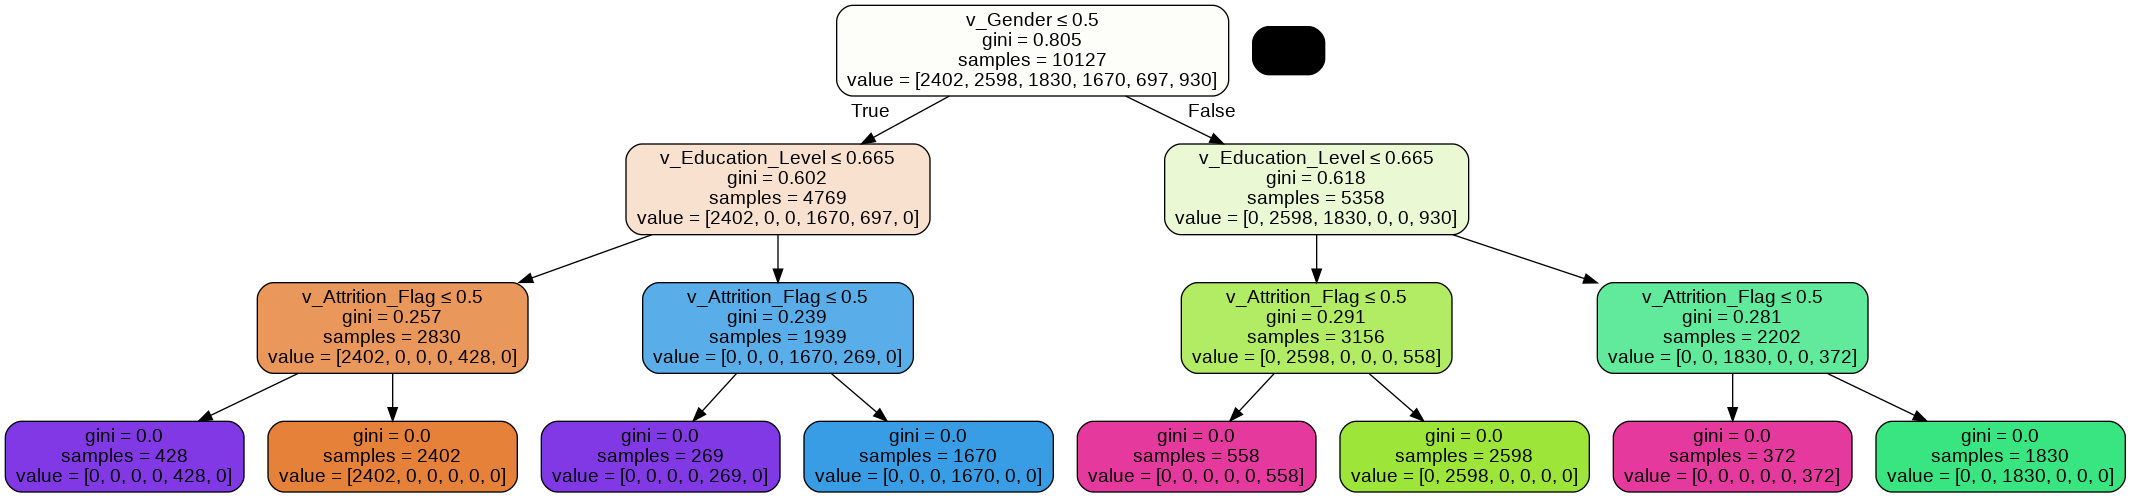

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=list(Xv[cluster_features].columns),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
15*15

225